### Project 4: Wrangle and Analyze Data
### Name: Andy Soelistio
### Submission Date: Dec-9-2018
### Course: Data Analyst Nanodegree 

# Project 4: We Rate Dogs  -- Wrangle And Analyze

## Table of Contents

<ul>
<li><a href="#part_one">Part One: Wrangling Data</a></li><br>
    <ul>
        <li><a href="#1_gather_data">1. Gather Data</a></li>
        <ul>
            <li><a href="#1a_manually">1a. Manually Downloaded File: Twitter Archive</a></li>
            <li><a href="#1b_programmatically">1b. Programmatically Downloaded File</a></li>
            <li><a href="#1c_data">1c. Data Scraped From Twitter API</a></li>
        </ul><br>
        <li><a href="#2_assess_data">2. Assess Data</a></li>
        <ul>
            <li><a href='#2_1_assess_df_archive'>2.1 Assess df_archive table</a></li>
            <ul>
              <li><a href='#2_1a_assess_doggo'>2.1a Assessing doggo, floofer, pupper and puppo column</a></li>
              <li><a href="#2_1b_vissually_inspecting">2.1b Visually inspecting text column</a></li>
              <li><a href="#2_1c_assessing_rating_numerator">2.1c Assessing rating_numerator and rating_denominator</a></li>
              <li><a href="#2_1d_assessing_expanded_urls">2.1d Assessing expanded_urls</a></li>
            </ul>
            <li><a href="#2_2_assessing_df_predictions">2.2 Assessing df_predictions table</a></li>
            <li><a href="#2_3_assessing_df_response">2.3 Assessing df_response table</a></li>
        </ul><br> 
        <li><a href="#3_cleaning_data">3. Cleaning Data</a></li>
        <br>
        <li><a href="#4_tidying_data">4. Tidying Data</a></li>
        <br>
        <li><a href="#5_further_cleaning">5. Further Cleaning Data</a></li>
        <br>
        <li><a href="#6_save_data">6. Save Cleaned Data</a></li>
    </ul>
<br>


<li><a href="#part_two">Part Two: Analyze and Visualize</a></li>
<br>
    <ul>
       <li><a href="#a_loading_data">A. Loading Data</a></li>
    </ul><br>
    <ul>
       <li><a href="#b_retweet_and_favorite">B. Retweet and Favorite</a></li>
       <ul>
          <li><a href="#b1_retweet_and_favorite">B1. Retweet and Favorite Count</a></li>
          <li><a href="#b2_retweet_and_favorite">B2. Retweet and Favorite Trends</a></li>
          <ul>
             <li><a href="#b2a_retweet_count">B2a. Retweet Count</a></li>
             <li><a href="#b2b_favorite_count">B2b. Favorite Count</a></li>
             <li><a href="#b2c_favorite_count">B2c. Favorite Count and Retweet Count Superimposed</a></li>
          </ul>
          <li><a href="#b3_relationship">B3. Relationship between Retweet/Favorite Count and Rating Numerator</a></li>
       </ul>
    </ul><br>
    <ul>
       <li><a href="#c_videos_images">C. Videos and Images of Highest/Lowest Retweet and Favorite Counts</a></li>
       <ul>
          <li><a href="#c1_high_retweets">C1. High Retweets</a></li>
          <li><a href="#c2_low_retweets">C2. Low Retweets</a></li>
          <li><a href="#c3_high_favorites">C3. High Favorites</a></li>
          <li><a href="#c4_low_favorites">C4. Low Favorites</a></li>
        </ul>
    </ul><br>
    <ul>
       <li><a href="#d_dog_types">D. Dog Types</a></li>
       <ul>
          <li><a href="#d1_conditional_probability">D1. Conditional Probability</a></li>
          <li><a href="#d2_popular_names">D2. Most Popular Names   </a></li>
        </ul>
    </ul><br> 
    <ul>
       <li><a href="#e_predictions">E. Predictions</a></li>
       <ul>
          <li><a href="#e1_how_confident">E1. How Confident</a></li>
          <ul>
             <li><a href="#e1a_prediction1">E1a. Prediction 1</a></li>
             <li><a href="#e1b_prediction2">E1b. Prediction 2</a></li>
             <li><a href="#e1c_prediction3">E1c. Prediction 3</a></li>
             <li><a href="#e1d_prediction4">E1d. Prediction 4</a></li>
             <li><a href="#e1e_prediction5">E1e. Prediction 5</a></li>
          </ul>
        </ul>
    </ul><br>


In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import json
import os
import requests
import string
import tweepy
from IPython.display import Image
from IPython.core.display import HTML 
%matplotlib inline
from tqdm import *
import pickle

In [2]:
def set_my_palette():
    sns.set()
    current_palette = sns.color_palette(my_palette)
    sns.set_palette(current_palette)

In [3]:
# choose color https://www.w3schools.com/colors/colors_picker.asp
my_palette = ['#4da6ff', '#00b386', '#ff6666', '#ffff66', '#8c66ff', '#4dffd2']
set_my_palette()
sns.set_context("talk")

In [4]:
def make_clickable(val):
    return '<a href="{}">{}</a>'.format(val,val)

<a id='part_one'></a>
# Part One: Wrangling Data

<a id='1_gather_data'></a>
## 1. Gather Data
We will obtain data from three sources, a manually downloaded csv file, a programmatically downloaded tsv file and data scraped from the Twitter API

<a id='1a_manually'></a>
### 1a. Manually Downloaded File: Twitter Archive

In [5]:
df_archive = pd.read_csv('data/twitter-archive-enhanced.csv')
df_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


<a id='1b_programmatically'></a>
### 1b. Programmatically Downloaded File

In [6]:
# Import Data Programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save Data
with open('data/image-predictions.tsv', "wb") as file: 
    file.write(response.content)
    
# Import Data
df_predictions = pd.read_csv('data/image-predictions.tsv', sep="\t")

df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<a id='1c_data'></a>
### 1c. Data Scraped From Twitter API

In [7]:
# https://developer.twitter.com/en/apps/15922101
# Import API Details into Working Memory
df_api = pd.read_csv("data/api-details.csv",header=None)

# Set up Twitter API Details
consumer_key = df_api.iloc[0,1]
consumer_secret = df_api.iloc[1,1]
access_token = df_api.iloc[2,1]
access_secret = df_api.iloc[3,1]

In [8]:
# Create Connection to API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth_handler=auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [9]:
tweet_ids = df_archive.tweet_id

In [10]:
# Write JSON to text file
failed_ids = []
tweet_count = 1

if not os.path.exists('data/tweet_json.txt'):
    with open('data/tweet_json.txt','a',encoding='UTF-8') as file:
        for tweet_id in tqdm(tweet_ids):
            try:
                #print(tweet_count + " -- " + datetime.datetime.now().time())
                tweet = api.get_status(tweet_id,tweet_mode='extended')._json
                json.dump(tweet,file)
                file.write('\n')
                #tweet_count += 1
            except:
                print(tweet_id, "encountered an error, writing to memory")
                failed_ids.append(tweet_id)

In [11]:
# Pickle Errors for later investigation
pickle.dump(failed_ids,open('data/failed_ids.pkl','wb'))

In [12]:
tweets_data = []
with open('data/tweet_json.txt') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue

In [13]:
list(tweets_data[0].keys())

['created_at',
 'id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang']

In [14]:
df_api = pd.DataFrame(tweets_data,columns=list(tweets_data[0].keys()))
df_api.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8381,38256,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6188,32799,False,False,False,False,en


In [15]:
# Reduce df_api to the necessary columns
df_response = df_api[['id','retweet_count','favorite_count']]

df_response.head()

,id,retweet_count,favorite_count
0,892420643555336193,8381,38256
1,892177421306343426,6188,32799
2,891815181378084864,4093,24697
3,891689557279858688,8514,41587
4,891327558926688256,9231,39766


In [16]:
# Save Dataframe for Visual Assessment
df_response.to_csv("data/tweet_json.csv")

<a id='2_assess_data'></a>
## 2. Assess Data

<a id='2_1_assess_df_archive'></a>
### 2.1 Assess df_archive table

In [17]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

>-- Total data count is 2,356<br><br>
**1.** in_reply_to_status_id has only 78 non-null float<br>
**2.** in_reply_to_user_id has only 78 non-null float<br>
**3.** retweeted_status_id has only 181 non-null float<br>
**4.** retweeted_status_user_id has only 181 non-null float<br>
**5.** retweeted_status_timestamp has only 181 non-null float<br>

<a id='2_1a_assess_doggo'></a>
#### 2.1a Assessing doggo, floofer, pupper and puppo column

In [18]:
column_vals = ['doggo','floofer','pupper','puppo']
df_archive[column_vals].sample(10)

,doggo,floofer,pupper,puppo
2126,None,None,None,None
2014,None,None,None,None
855,None,None,None,None
2042,None,None,None,None
1922,None,None,None,None
605,None,None,None,None
1856,None,None,None,None
1993,None,None,None,None
2047,None,None,None,None
2115,None,None,None,None


>**6a.** NaN is represented by "None" string

In [19]:
df_archive[['doggo','floofer','pupper','puppo']].describe()

,doggo,floofer,pupper,puppo
count,2356,2356,2356,2356
unique,2,2,2,2
top,None,None,None,None
freq,2259,2346,2099,2326


>**6b.** There many "None objects" but the count is still 2,356

<a id='2_1b_vissually_inspecting'></a>
#### 2.1b Visually inspecting text column

#### Visually inspecting text column take 1

In [20]:
for row in df_archive.text.sample(30):
    print(row)
    print('===============')

There's a lot going on here but in my honest opinion every dog pictured is pretty fabulous. 10/10 for all. Good dogs https://t.co/VvYVbsi6c3
This is Tedders. He broke his leg saving babies from the Pompeii eruption. 11/10 where's his Purple Heart? @POTUS https://t.co/cMI2AcLm4B
RT @dog_rates: In case you haven't seen the most dramatic sneeze ever... 13/10 https://t.co/iy7ylyZcsE
This is Meera. She just heard about taxes and how much a doghouse in a nice area costs. Not pupared to be a  doggo anymore. 12/10 https://t.co/GZmNEdyoJY
Meet Duke. He's an Urban Parmesan. They know he's scared of the green rubber dog. "Why u do dis?" thinks Duke. 10/10 https://t.co/3bim9U5Idr
This is Linus. He just wanted to say hello but no one's paying attention. 12/10 (vid by @rebeccacollinzz) https://t.co/VCijm2eVpR
This little pupper just arrived. 11/10 would snug https://t.co/DA5aqnSGfB
This is Blitz. He's a new dad struggling to cope mentally with the pressures of being a father. Sick shades 10/10 https

#### Observations on df_archive text column take 1:
>
>   -- By clicking the https link, a twitter page will open. Text column is the comment on the twitter page;there is also a picture of dog. 
<br><br>
-- On the twitter page, there are Retweets, Likes and Replies.<br><br>
>   **8f.** There is a dog type in  text column <br>
>   **7a.** There is rating numerator and denominator in  text column


#### Visually inspecting text column take 2

In [21]:
# check if name is captured 
df_archive[['text','name']].sample(30)

,text,name
1680,Unique dog here. Wrinkly as hell. Weird segmen...,None
55,@roushfenway These are good dogs but 17/10 is ...,None
2346,Here is the Rand Paul of retrievers folks! He'...,the
1828,All this pupper wanted to do was go skiing. No...,None
1029,This is Percy. He fell asleep at the wheel. Ir...,Percy
2335,This is an Albanian 3 1/2 legged Episcopalian...,an
708,This is Doc. He requested to be carried around...,Doc
138,Meet Boomer. He's just checking pup on you. Ho...,Boomer
1943,I know a lot of you are studying for finals. G...,None
958,Here's a pupper that's very hungry but too laz...,None


>   
   **8a.** Name of dog generally is in the first sentence. <br>
>  **8b.** First character of name of dog is a capital. <br>
   **8c.** There is None in name column. 

#### Visually inspecting text column take 3

In [22]:
# None should be replaced by NaN
# index: 1550
print("Name: " + df_archive.name[1550] + ' --- ' + df_archive.text[1550])

Name: None --- We normally don't rate birds but I feel bad cos this one forgot to fly south for the winter. 9/10 just wants a bath https://t.co/o47yitCn9N


In [23]:
# two dogs in picture but only one name is captured.
# index: 1007
print("Name: " + df_archive.name[1007] + ' --- ' + df_archive.text[1007])

Name: Bookstore --- This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ


In [24]:
# name not captured in name column
# index: 2264
print('Name: ' + df_archive.name[2264] + ' --- ' + df_archive.text[2264])

Name: a --- This is a southwest Coriander named Klint. Hat looks expensive. Still on house arrest :(
9/10 https://t.co/IQTOMqDUIe


In [25]:
# index: 2269, 2232. Missing Names
print('Name: ' + df_archive.name[2269] + ' --- ' + df_archive.text[2269])
print('===============')
print('Name: ' + df_archive.name[2232] + ' --- ' + df_archive.text[2232])

Name: None --- This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7
Name: None --- These two dogs are Bo &amp; Smittens. Smittens is trying out a new deodorant and wanted Bo to smell it. 10/10 true pals https://t.co/4pw1QQ6udh


> **8d.** Name is missing even though there is a name in text column.<br>
  **8e.** There are compound names in text column that are not captured in name column

<a id='2_1c_assessing_rating_numerator'></a>
#### 2.1c Assessing rating_numerator and rating_denominator

In [26]:
df_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [27]:
df_archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

> **7b.** There is a 'disjoint' max in both rating numerator(1776) and denominator(170). 

<a id='2_1d_assessing_expanded_urls'></a>
#### 2.1d Assessing expanded_urls

In [28]:
for expanded_url in df_archive.expanded_urls[0:6]:
    print("Expanded url: " + expanded_url)

Expanded url: https://twitter.com/dog_rates/status/892420643555336193/photo/1
Expanded url: https://twitter.com/dog_rates/status/892177421306343426/photo/1
Expanded url: https://twitter.com/dog_rates/status/891815181378084864/photo/1
Expanded url: https://twitter.com/dog_rates/status/891689557279858688/photo/1
Expanded url: https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1
Expanded url: https://twitter.com/dog_rates/status/891087950875897856/photo/1


> **9.** There are redundant double data urls in `expanded_urls' column

In [29]:
# 891087950875897856
# this is index 5
test = df_archive[df_archive.tweet_id == 891087950875897856]

In [30]:
# this is index 5
print(df_archive.text[5])

Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh


In [31]:
# this is index 4
print(df_archive.text[4])

This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f


#### Observation on expanded_urls
- They are basically open the same page. I take an example for index 5.<br>
  In text column the link is: https://t.co/kQ04fDDRmh <br>
  In expanded_urls, the link is: https://twitter.com/dog_rates/status/891087950875897856/photo/1 <br>
  Note: https://t.co/kQ04fDDRmh expanded to https://twitter.com/dog_rates/status/891087950875897856/photo/1 .
  Thus it is called expanded_urls 😊

> **10.** There is a shortened url in text column.<br>
> **25.** short_url == expanded_url ??? <br>
> **16.** Can expanded_urls link be opened?

<a id='2_2_assessing_df_predictions'></a>
### 2.2 Assessing df_predictions table

In [32]:
df_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [33]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Observations on df_predictions table:
>
> **11.** Can we just use df_predictions's tweet_id? Is it a subset of df_archive's tweet_id?<br>
> **12.** Redundant columns: p1,p2,p3. p1_conf,p2_conf,p3_conf. p1_dog,p2_dog,p3_dog. <br>
>      Redundant columns not a good database practice. What happens if there are 10 more observations.
<br>
> **15.** Can the jpg_url link be opened?
>
> - We need to add more columns. Why not just group them into prediction, confidence and dog columns. 

<a id='2_3_assessing_df_response'></a>
### 2.3 Assessing df_response table

In [34]:
df_response.head(3)

,id,retweet_count,favorite_count
0,892420643555336193,8381,38256
1,892177421306343426,6188,32799
2,891815181378084864,4093,24697


In [35]:
df_response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
id                2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


> **13.** Can we just merge df_reponse to df_archive?

<a id='3_cleaning_data'></a>
# 3. Cleaning Data

In [36]:
# Copy Dataframes for Cleaning
df_archive_clean = df_archive.copy()
df_predictions_clean = df_predictions.copy()
df_response_clean = df_response.copy()

### Define 
- Solution to Issue **#6a,b,8f:** Extract dog type from text column. None to NaN

### Code

In [37]:
dog_types = list(df_archive.iloc[:,-4:])
dog_types

['doggo', 'floofer', 'pupper', 'puppo']

In [38]:
def find_dog_type(df, dog_type):
    dog_list = []
    for row in df['text']:
        if dog_type in row:
            dog_list.append(dog_type)
        else:
            dog_list.append(np.NaN)
    return dog_list

In [39]:
for dog_type in dog_types:
    df_archive_clean[dog_type] = find_dog_type(df_archive,dog_type)

### Test

In [40]:
df_archive_clean[dog_types].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 4 columns):
doggo      98 non-null object
floofer    4 non-null object
pupper     272 non-null object
puppo      37 non-null object
dtypes: object(4)
memory usage: 73.7+ KB


In [41]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         98 non-null object
floofer                       4 non-null object
pupper                        272 non-null object
puppo                         37 non-null object
dtypes: float64(4), int64(3), object(10)

> **14.** Multiple columns contain  the same type of data: doggo, floofer, pupper, puppo

### Define
- Solution to issue **#8a,b,c,d,e:** Pet names are capitalized, usually less than 10 characters but at least 2, and typically found before the first period. They typically only include letters and apostrophes and certain words are not usually as pet names. Change None to NaN

### Code

In [42]:
def find_names(df):
    name_list = []
    for row in df.text:
        first_period = row.find('.')
        if first_period == -1:
            name_list.append(np.NaN)
        else:
            word_before = row[:first_period].rsplit(' ',1)[-1]
            #print(word_before)
            if word_before == word_before.title():
                other_words = ["Pupper","Doggo","Puppo","Floofer","Oh","This","Xbox","Christmas","Up"]
                if (len(word_before) > 10) or (len(word_before) < 2 or\
                    any(word in word_before for word in other_words) or\
                    any(c for c in word_before if c not in string.ascii_letters + "'")):
                    name_list.append(np.NaN)
                else:
                    name_list.append(word_before)
            else:
                name_list.append(np.NaN)
    return name_list           

In [43]:
name_list = find_names(df_archive)
df_archive_clean.name = name_list

### Test

In [44]:
df_archive_clean.sample(10).name

2212        NaN
1436    Charlie
1282       Coco
2237     Oliver
1016        NaN
873       Bruce
1766        NaN
712      Stormy
1406      Charl
1929        NaN
Name: name, dtype: object

In [45]:
# Visually compare sample of results
df_archive_clean.sample(20)[['text','name']]

,text,name
1848,This is Bernie. He just touched a boob for the...,Bernie
333,This is Willow. She's the official strawberry ...,Willow
854,This is Gromit. He's pupset because there's no...,Gromit
2327,This is a southern Vesuvius bumblegruff. Can d...,NaN
981,This is Finn. He's the most unphotogenic puppe...,Finn
76,This is Emmy. She was adopted today. Massive r...,Emmy
1561,This is Louis. He's takes top-notch selfies. 1...,Louis
1270,Meet Karma. She's just a head. Lost body durin...,Karma
1685,This is Toffee. He's a happy pupper. Appears d...,Toffee
324,This is Lipton. He's a West Romanian Snuggle P...,Lipton


### Define
- Solution to issue **#15:** Check if each jpg_url in df_predictions_clean exist.

### Code


We test with one url link (https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg) below:

In [46]:
# REFERENCES: https://stackoverflow.com/questions/16778435/python-check-if-website-exists
# try this link: https://t.co/eUGjGjjFVJ

# we test on url https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg if it can be opened
try:
    request = requests.get('https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg') 
    reply_status_code = request.status_code
    if reply_status_code == 200:
        print('Website exists')
    else:
        print('Website does not exist')
except:
    print('Website Error')


Website exists


In [47]:
jpg_url_list = df_predictions_clean.jpg_url
len(jpg_url_list)

2075

> `jpg_url_list` contains 2075 jpg urls and we are going to check if each url exists below!

In [48]:
if not os.path.exists('data/predictions_jpg_url_exist.txt'):
    with open('data/predictions_jpg_url_exist.txt','a',encoding='UTF-8') as file:
        for url in tqdm(jpg_url_list):
            try:
                request = requests.get(url)
                reply_status_code = request.status_code
                if reply_status_code == 200:
                    file.write(url)
                    file.write('\n')
                else:
                    file.write('None')
                    file.write('\n')
                    print('Website does not exist')
            except:
                file.write('None')
                file.write('\n')
                print('Website error')

> What the above code does is: if url exists, it will be written to a file. if a url doesn't exist, <br>
> 'None' will be written.

In [49]:
jpg_url_exist_2 = pd.read_csv('data/predictions_jpg_url_exist.txt',header=None)
df_predictions_clean['jpg_url_2'] = jpg_url_exist_2

In [50]:
for index,url_2 in enumerate(df_predictions_clean.jpg_url_2):
    if url_2 == 'None':
        print(index)

496
1835


> There are only 2 jpg_urls that can't be opened in df_predictions_clean. We test them with code below.

In [51]:
df_predictions_clean.loc[496][['jpg_url_2','jpg_url']]

jpg_url_2                                               None
jpg_url      https://pbs.twimg.com/media/CWDbv2yU4AARfeH.jpg
Name: 496, dtype: object

In [52]:
df_predictions_clean.loc[1835][['jpg_url_2','jpg_url']]

jpg_url_2                                               None
jpg_url      https://pbs.twimg.com/media/C52pYJXWgAA2BEf.jpg
Name: 1835, dtype: object

> Clicking the two jpg_urls above will show that their websites don't exist. Now we convert the None into NaN. Then drop rows that have NaN jpg_url_2

In [53]:
# convert None to NaN
for index,url_2 in enumerate(df_predictions_clean.jpg_url_2):
    if url_2 == 'None':
        print(index)
        tweet_id = df_predictions_clean.loc[index,'tweet_id']
        print(tweet_id)
        df_predictions_clean.loc[index,'jpg_url_2'] = np.NaN

496
675781562965868544
1835
837012587749474308


In [54]:
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 13 columns):
tweet_id     2075 non-null int64
jpg_url      2075 non-null object
img_num      2075 non-null int64
p1           2075 non-null object
p1_conf      2075 non-null float64
p1_dog       2075 non-null bool
p2           2075 non-null object
p2_conf      2075 non-null float64
p2_dog       2075 non-null bool
p3           2075 non-null object
p3_conf      2075 non-null float64
p3_dog       2075 non-null bool
jpg_url_2    2073 non-null object
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 168.3+ KB


In [55]:
# two rows with NaN
(df_predictions_clean.jpg_url_2.isnull()).sum()

2

In [56]:
# tweet_id that whose jpg_url can't be opened
df_predictions_clean[df_predictions_clean.jpg_url_2.isnull()]['tweet_id']

496     675781562965868544
1835    837012587749474308
Name: tweet_id, dtype: int64

In [57]:
# remove rows that jpg can't be opened or with NaN jpg_url
jpg_url_filter = (~df_predictions_clean.jpg_url_2.isnull())
df_predictions_clean = df_predictions_clean[jpg_url_filter]

In [58]:
df_predictions_clean = df_predictions_clean.reset_index()

In [59]:
for index,url in enumerate(df_predictions_clean.jpg_url):
    #print(df_predictions_clean.loc[index,'jpg_url_2'])
    if url == df_predictions_clean.loc[index,'jpg_url_2']:
        continue
    else:
        print('different')

In [60]:
# remove columns jpg_url_2 and index
df_predictions_clean.drop(columns=['index','jpg_url_2'],axis=1,inplace=True)

### Test

In [61]:
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 12 columns):
tweet_id    2073 non-null int64
jpg_url     2073 non-null object
img_num     2073 non-null int64
p1          2073 non-null object
p1_conf     2073 non-null float64
p1_dog      2073 non-null bool
p2          2073 non-null object
p2_conf     2073 non-null float64
p2_dog      2073 non-null bool
p3          2073 non-null object
p3_conf     2073 non-null float64
p3_dog      2073 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 151.9+ KB


In [62]:
(df_predictions_clean.jpg_url.isnull()).sum()

0

> Two rows removed. Now all jpg_urls in df_predictions can be 'opened'! 

### Define
- Solution to issue **#9:** some expanded_urls has double (redundant) data has to split them up


### Code

In [63]:
df_archive_clean.loc[4,'expanded_urls']

'https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1'

In [64]:
df_archive_clean.loc[310,'expanded_urls']

'https://vine.co/v/5W2Dg3XPX7a,https://vine.co/v/5W2Dg3XPX7a'

- Above are two examples of expanded_urls that contain redundant/double data at index 4 and 310

In [65]:
url_list = []
for index,row in enumerate(df_archive_clean.expanded_urls):
    #print(row)
    if(type(row) == float):
        #print(index," None")
        url_list.append(np.NaN)
    elif row.find(',') == -1:
        #print(index)
        url_list.append(row)
    else:
        #print(index)
        url_list.append(row.split(',')[0])

In [66]:
# now contain only single https://
df_archive_clean.expanded_urls = url_list

### Test

In [67]:
df_archive_clean.loc[4,'expanded_urls']

'https://twitter.com/dog_rates/status/891327558926688256/photo/1'

In [68]:
df_archive_clean.loc[310,'expanded_urls']

'https://vine.co/v/5W2Dg3XPX7a'

### Define
- Solution to issue **#16:** Check if each expanded_urls in df_archive_clean exist / can be 'opened'. Remove rows that contain expanded_url that can't be 'opened'.

### Code

In [69]:
expanded_urls_list = df_archive_clean.expanded_urls
len(expanded_urls_list)

2356

In [70]:
if not os.path.exists('data/expanded_urls_exist.txt'):
    with open('data/expanded_urls_exist.txt','a',encoding='UTF-8') as file:
        for url in tqdm(expanded_urls_list):
            try:
                request = requests.get(url)
                reply_status_code = request.status_code
                if reply_status_code == 200:
                    file.write(url)
                    file.write('\n')
                else:
                    file.write('None')
                    file.write('\n')
                    print('Website does not exist')
            except:
                file.write('None')
                file.write('\n')
                print('Website error')

In [71]:
df_expanded_urls_exist = pd.read_csv('data/expanded_urls_exist.txt',header=None)

In [72]:
# make None to NaN
def NoneToNaN(s_eries):
    return_list = []
    for row in s_eries:
        if row == 'None':
            return_list.append(np.NaN)
        else:
            return_list.append(row)
    return return_list

In [73]:
df_expanded_urls_exist[0]=NoneToNaN(df_expanded_urls_exist[0])

In [74]:
df_expanded_urls_exist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 1 columns):
0    2285 non-null object
dtypes: object(1)
memory usage: 18.5+ KB


In [75]:
print('Number of data loss or number of link that can\'t be opened: ' + str(2356 - 2285))

Number of data loss or number of link that can't be opened: 71


>I'm willing to lose 71 data. But all expanded urls can be opened.

In [76]:
# Replace current expanded_urls with new df_expanded_urls_exist
df_archive_clean.expanded_urls = df_expanded_urls_exist

In [77]:
expanded_url_na_filter = df_archive_clean.expanded_urls.isnull()
expanded_url_na_filter.sum()

71

In [78]:
# remove rows when expanded_url is NaN
df_archive_clean = df_archive_clean[~expanded_url_na_filter]

### Test

In [79]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2285 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2285 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2285 non-null object
source                        2285 non-null object
text                          2285 non-null object
retweeted_status_id           175 non-null float64
retweeted_status_user_id      175 non-null float64
retweeted_status_timestamp    175 non-null object
expanded_urls                 2285 non-null object
rating_numerator              2285 non-null int64
rating_denominator            2285 non-null int64
name                          1526 non-null object
doggo                         94 non-null object
floofer                       4 non-null object
pupper                        270 non-null object
puppo                         34 non-null object
dtypes: float64(4), int64(3), object(10)

In [80]:
df_archive.shape[0] - df_archive_clean.shape[0]

71

> Thus 71 rows were removed. At this stage, all expanded_urls can be opened.

<a id='4_tidying_data'></a>
## 4. Tidying Data

The next step is to address tidiness issues. 

> **Issue #14.** Multiple columns contain  the same type of data: doggo, floofer, pupper, puppo<br><br>
> **Issue #12.** Redundant columns: p1,p2,p3. p1_conf,p2_conf,p3_conf. p1_dog,p2_dog,p3_dog. <br>
>      Redundant columns not a good database practice. What happens if there are 10 more observations.
<br><br>
> **Issue #13.** Can we just merge df_reponse to df_archive? Tweet data from response api_data is separate from the other tweet data in df_archive_clean

### Define

- **Solution to issue #14:** Create a column called `dog_type` and merge all data in order of `puppo`, `pupper`, <br>
`floofer`, `doggo` using `fillna`. Then drop redundant columns.

### Code

In [81]:
df_archive_clean['dog_type'] = df_archive_clean.puppo.fillna(df_archive_clean.pupper.fillna(df_archive_clean.floofer.fillna(df_archive_clean.doggo)))

In [82]:
df_archive_clean.dog_type.value_counts()

pupper     270
doggo       82
puppo       34
floofer      4
Name: dog_type, dtype: int64

In [83]:
df_archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

### Test

In [84]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2285 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2285 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2285 non-null object
source                        2285 non-null object
text                          2285 non-null object
retweeted_status_id           175 non-null float64
retweeted_status_user_id      175 non-null float64
retweeted_status_timestamp    175 non-null object
expanded_urls                 2285 non-null object
rating_numerator              2285 non-null int64
rating_denominator            2285 non-null int64
name                          1526 non-null object
dog_type                      390 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 267.8+ KB


In [85]:
df_archive_clean.dog_type.value_counts()

pupper     270
doggo       82
puppo       34
floofer      4
Name: dog_type, dtype: int64

### Define

- **Solution to issue #12:**
<br>
Change columns names for ease of use with `pd.wide_to_long`. Use `pd.wide_to_long` to:

- melt `p1_conf`,`p2_conf`,`p3_conf` to a `confidence` column
- melt `p1`,`p2`,`p3` to a `prediction` column
- melt `p1_dog`,`p2_dog`,`p3_dog` to a `dog` column

### Code

In [86]:
df_predictions_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [87]:
size_predictions_before_melt = df_predictions_clean.shape[0]
size_predictions_before_melt

2073

In [88]:
# Change column names
col_names = ['tweet_id','jpg_url','img_num',
             'prediction_1','confidence_1','dog_1',
             'prediction_2','confidence_2','dog_2',
             'prediction_3','confidence_3','dog_3']
df_predictions_clean.columns = col_names
df_predictions_clean.head(2)

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,dog_1,prediction_2,confidence_2,dog_2,prediction_3,confidence_3,dog_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [89]:
df_predictions_clean = pd.wide_to_long(df_predictions_clean,
                    stubnames=['prediction','confidence','dog'],
                    i=['tweet_id','jpg_url','img_num'],
                    j='prediction_order',sep='_').reset_index()

### Test

In [90]:
df_predictions_clean.head(9)

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True
5,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,3,Rhodesian_ridgeback,0.072010,True
6,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,German_shepherd,0.596461,True
7,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,2,malinois,0.138584,True
8,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,3,bloodhound,0.116197,True


In [91]:
df_predictions_clean.shape[0] / size_predictions_before_melt

3.0

>As expected, after the melt, the new table has expanded by a factor of 3.

#### Resources
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.wide_to_long.html

### Define

- **Solution to issue #13:** Merge the data from response api_data with df_archive data

### Code

In [92]:
df_archive_clean.shape

(2285, 14)

In [93]:
df_response_clean.shape

(2340, 3)

In [94]:
df_response_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
id                2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [95]:
desired_cols = ['tweet_id','retweet_count','favorite_count']

In [96]:
# Change column names
df_response_clean.columns = desired_cols
df_response.columns = desired_cols

In [97]:
# this is left join. Note the shape[0]
df_archive_clean = pd.merge(left=df_archive_clean,right=df_response_clean,how='left',on='tweet_id')
df_archive_clean.shape

(2285, 16)

### Test

In [98]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2285 entries, 0 to 2284
Data columns (total 16 columns):
tweet_id                      2285 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2285 non-null object
source                        2285 non-null object
text                          2285 non-null object
retweeted_status_id           175 non-null float64
retweeted_status_user_id      175 non-null float64
retweeted_status_timestamp    175 non-null object
expanded_urls                 2285 non-null object
rating_numerator              2285 non-null int64
rating_denominator            2285 non-null int64
name                          1526 non-null object
dog_type                      390 non-null object
retweet_count                 2272 non-null float64
favorite_count                2272 non-null float64
dtypes: float64(6), int64(3), object(7)
memory usage: 303.5+ KB


<a id='5_further_cleaning'></a>
## 5. Further Cleaning Data

### Define
- **Issue #17:** Remove any tweet ids in the `df_archive_clean` table that aren't in the `df_predictions_clean` table

### Code

In [99]:
tweet_id_filter = ~df_archive_clean.tweet_id.isin(list(df_predictions_clean.tweet_id))
# Number of tweet_ids in df_archive_clean not in df_predictions_clean
tweet_id_filter.sum()   

216

> 216 rows to be removed

In [100]:
df_archive_clean.shape

(2285, 16)

In [101]:
# Remove tweet_ids that are not in df_predictions_clean
df_archive_clean = df_archive_clean[~tweet_id_filter]

In [102]:
df_archive_clean.shape

(2069, 16)

### Test

In [103]:
(~df_archive_clean.tweet_id.isin(list(df_predictions_clean.tweet_id))).sum()

0

In [104]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2284
Data columns (total 16 columns):
tweet_id                      2069 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2069 non-null object
source                        2069 non-null object
text                          2069 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2069 non-null object
rating_numerator              2069 non-null int64
rating_denominator            2069 non-null int64
name                          1417 non-null object
dog_type                      337 non-null object
retweet_count                 2062 non-null float64
favorite_count                2062 non-null float64
dtypes: float64(6), int64(3), object(7)
memory usage: 274.8+ KB


### Define

- **Issue #1,#2:** Identify rows that have info for in_reply_to_status_id or in_reply_to_user_id and remove from df_archive_clean table.
- **Issue #3,#4,#5:** Identify rows that have info for in retweeted_status_id or retweeted_status_user_id or 
  retweeted_status_timestamp and remove from df_archive_clean table.
- **Issue #1,#2,#3,#4,#5:** Remove redundant columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,
  retweeted_status_timestamp.
- Remove non-shared ids from df_predictions_clean table.
  
### Code

In [105]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

> in_reply has reduced from 78 to 23 non-null float and retweeted_status has reduced from 181 to 79 non-null float.

In [106]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2284
Data columns (total 16 columns):
tweet_id                      2069 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2069 non-null object
source                        2069 non-null object
text                          2069 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2069 non-null object
rating_numerator              2069 non-null int64
rating_denominator            2069 non-null int64
name                          1417 non-null object
dog_type                      337 non-null object
retweet_count                 2062 non-null float64
favorite_count                2062 non-null float64
dtypes: float64(6), int64(3), object(7)
memory usage: 274.8+ KB


In [107]:
# counting in_reply_to_status_id and in_reply_to_user_id
cols_in_reply = ['in_reply_to_status_id','in_reply_to_user_id']
in_reply_filter = (~df_archive_clean[cols_in_reply].isnull())
in_reply_filter.sum()

in_reply_to_status_id    23
in_reply_to_user_id      23
dtype: int64

In [108]:
# visually inspecting in_reply_to_status_id and in_reply_to_user_id
df_archive_clean[in_reply_filter['in_reply_to_status_id']][cols_in_reply]

,in_reply_to_status_id,in_reply_to_user_id
142,6.671522e+17,4.196984e+09
176,8.558181e+17,4.196984e+09
234,7.590995e+17,4.196984e+09
532,7.331095e+17,4.196984e+09
970,7.468859e+17,4.196984e+09
972,6.914169e+17,4.196984e+09
1080,7.291135e+17,4.196984e+09
1282,7.032559e+17,4.196984e+09
1291,6.671522e+17,4.196984e+09
1307,7.030419e+17,4.196984e+09


> From visually inspection above, `in_reply_to_status_id` and `in_reply_to_user_id` have the same size and both are filled at each corresponding row. So by removing these 23 rows, we will get rid of undesired rows.

In [109]:
replies_mask = ~df_archive_clean.in_reply_to_status_id.isnull()
replies_mask.sum()

23

In [110]:
# Remove replies
df_archive_clean = df_archive_clean[~replies_mask]

#### Now solving issue #3, #4, #5
> `retweeted_status_id`,`retweeted_status_user_id`,`retweeted_status_timestampe` is similar to `in_reply_to_status_id` and `in_reply_to_user_id`.

In [111]:
retweets_mask = ~df_archive_clean.retweeted_status_user_id.isnull()
retweets_mask.sum()

79

In [112]:
retweet_cols = ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']

In [113]:
# Visualizing columns
df_archive_clean[retweets_mask][retweet_cols][0:40]

,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp
19,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000
34,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000
74,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000
91,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000
124,8.650134e+17,7.874618e+17,2017-05-18 01:17:25 +0000
148,8.066291e+17,4.196984e+09,2016-12-07 22:38:52 +0000
153,8.609145e+17,3.638908e+08,2017-05-06 17:49:42 +0000
198,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000
199,8.482894e+17,3.410211e+08,2017-04-01 21:42:03 +0000
216,8.479710e+17,5.970642e+08,2017-04-01 00:36:55 +0000


In [114]:
df_archive_clean[retweets_mask][retweet_cols][40:79]

,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp
550,7.750851e+17,4.196984e+09,2016-09-11 21:34:30 +0000
560,7.128090e+17,4.196984e+09,2016-03-24 01:11:29 +0000
561,7.012147e+17,4.196984e+09,2016-02-21 01:19:47 +0000
564,6.755011e+17,4.196984e+09,2015-12-12 02:23:01 +0000
565,6.718968e+17,4.196984e+09,2015-12-02 03:40:57 +0000
566,6.704450e+17,4.196984e+09,2015-11-28 03:31:48 +0000
567,6.675094e+17,4.196984e+09,2015-11-20 01:06:48 +0000
570,7.717705e+17,4.196984e+09,2016-09-02 18:03:10 +0000
581,7.961497e+17,4.196984e+09,2016-11-09 00:37:46 +0000
590,7.895309e+17,4.196984e+09,2016-10-21 18:16:44 +0000


In [115]:
# Now remove 79 retweets
df_archive_clean = df_archive_clean[~retweets_mask]

### Test

In [116]:
# Note in_reply and retweeted_status removed
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2284
Data columns (total 16 columns):
tweet_id                      1967 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1967 non-null object
source                        1967 non-null object
text                          1967 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1967 non-null object
rating_numerator              1967 non-null int64
rating_denominator            1967 non-null int64
name                          1363 non-null object
dog_type                      321 non-null object
retweet_count                 1965 non-null float64
favorite_count                1965 non-null float64
dtypes: float64(6), int64(3), object(7)
memory usage: 261.2+ KB


#### Now drop in_reply_to and retweeted_status columns

In [117]:
cols_to_drop = ['in_reply_to_status_id','in_reply_to_user_id',
                'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']

df_archive_clean.drop(cols_to_drop,axis=1,inplace=True)
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2284
Data columns (total 11 columns):
tweet_id              1967 non-null int64
timestamp             1967 non-null object
source                1967 non-null object
text                  1967 non-null object
expanded_urls         1967 non-null object
rating_numerator      1967 non-null int64
rating_denominator    1967 non-null int64
name                  1363 non-null object
dog_type              321 non-null object
retweet_count         1965 non-null float64
favorite_count        1965 non-null float64
dtypes: float64(2), int64(3), object(6)
memory usage: 184.4+ KB


### Define

- **Issue #18:** Remove non-shared ids from df_predictions_clean table.
  
### Code

In [118]:
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6219 entries, 0 to 6218
Data columns (total 7 columns):
tweet_id            6219 non-null int64
jpg_url             6219 non-null object
img_num             6219 non-null int64
prediction_order    6219 non-null int64
prediction          6219 non-null object
confidence          6219 non-null float64
dog                 6219 non-null bool
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 297.7+ KB


In [119]:
# Identify tweet_ids in predictions not in df_archive
not_shared_filter = ~df_predictions_clean.tweet_id.isin(list(df_archive_clean.tweet_id))
not_shared_filter.sum()

318

In [120]:
#Remove tweet_ids not in df_archive_clean
df_predictions_clean = df_predictions_clean[~not_shared_filter]

### Test

In [121]:
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5901 entries, 0 to 6218
Data columns (total 7 columns):
tweet_id            5901 non-null int64
jpg_url             5901 non-null object
img_num             5901 non-null int64
prediction_order    5901 non-null int64
prediction          5901 non-null object
confidence          5901 non-null float64
dog                 5901 non-null bool
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 328.5+ KB


> The size of df_archive_clean's tweet_id is 1967. Multiply this by 3 to the size of df_predictions_clean's tweet id is 5901. This makes sense since prediction_order is 3.

In [122]:
# Confirm no unshared df_prediction_clean tweet_id's with df_archive_clean
(~df_predictions_clean.tweet_id.isin(list(df_archive_clean.tweet_id))).sum()

0

### Define

- **Solution to Issue #10:** Extract the `short url` from `text` column and put it in a new column called `short_url`
- **Solution to Issue #25:** Show that `short_url` and `expanded_url` is the same 

  
### Code

In [123]:
# Note: have to take into account of double http
for row in df_archive_clean.text[0:7]:
    #print(row)
    http_first = row.find('https')
    http_link = row[http_first:]
    print(http_link)

https://t.co/MgUWQ76dJU
https://t.co/0Xxu71qeIV
https://t.co/wUnZnhtVJB
https://t.co/tD36da7qLQ
https://t.co/AtUZn91f7f
https://t.co/kQ04fDDRmh
https://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl


In [124]:
def extract_short_url(df):
    short_url_list = []
    for row in df.text:
        #print(row)
        http_first = row.find('https')
        if http_first == -1:
            short_url_list.append(np.NaN)
            print('No url list')
        else:
            #print(http_first)
            http_link = row[http_first:]
            #print(http_link)
            http_link_search_second = http_link[1:]
            http_second = http_link_search_second.find('https')
            #print(http_second)
            if http_second == -1:
                short_url_list.append(http_link)
            else:
                #short_url_list.append(http_link)
                http_link2 = row[http_first+http_second:]
                http_link2 = http_link2.strip()
                short_url_list.append(http_link2)
    return short_url_list

In [125]:
# Create a new column called short_url
df_archive_clean['short_url'] = extract_short_url(df_archive_clean)

In [126]:
# Remove url from text column
def remove_url(text):
    http_pos = text.find('https')
    # if no url found, retain text
    if http_first == -1:
        text = text
    else:
        text = text[:http_pos-1]
    return text

In [127]:
df_archive_clean.text = df_archive_clean.text.apply(remove_url)

### Test

In [128]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2284
Data columns (total 12 columns):
tweet_id              1967 non-null int64
timestamp             1967 non-null object
source                1967 non-null object
text                  1967 non-null object
expanded_urls         1967 non-null object
rating_numerator      1967 non-null int64
rating_denominator    1967 non-null int64
name                  1363 non-null object
dog_type              321 non-null object
retweet_count         1965 non-null float64
favorite_count        1965 non-null float64
short_url             1967 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 199.8+ KB


In [129]:
col_url = ['expanded_urls','short_url']
def print_url(df):
    #index = 0
    for index,row in enumerate(df.expanded_urls):
        print(df.iloc[index]['short_url'] + ' --- ' + row )
        print('\n')

In [130]:
print_url(df_archive_clean.sample(3))

https://t.co/C7M8mnzHIK --- https://twitter.com/dog_rates/status/681610798867845120/photo/1


https://t.co/9aMxSbOaAZ --- https://twitter.com/dog_rates/status/728046963732717569/photo/1


https://t.co/lyXX3v5j4s --- https://twitter.com/dog_rates/status/675820929667219457/photo/1




> Click the short version url and expanded url above, you will be forwarded to the same page.
<br><br>
> short url has been removed from text column shown below.

In [172]:
for row in df_archive_clean.text[0:2]:
    print(row)
    print('--------------------')

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
--------------------
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
--------------------


### Define

- **Solution to Issue #7a & b:** Extract the `rating_numerator` from `text` column.

  
### Code

In [173]:
def find_numerator(x):
    # Ratings are associated with the last "/"
    slash = x.rfind("/")
    try:
        numerator = x[slash - 2:slash].strip().strip("(")
        return float(numerator)
    except ValueError:
        return np.NaN

In [174]:
df_archive_clean.rating_numerator = df_archive_clean.text.apply(find_numerator)

In [175]:
# Identify strange formatting
missing_numerator = list(df_archive_clean[df_archive_clean.rating_numerator.isnull()].index)
missing_numerator

[2146, 2176]

In [176]:
for index in missing_numerator:
    print(df_archive_clean.text[index])
    print('---------------')

This is Spark. He's nervous. Other dog hasn't moved in a while. Won't come when called. Doesn't fetch well 8/10&amp;1/10
---------------
This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10
---------------


In [177]:
# Choose 8 and 10
df_archive_clean.loc[missing_numerator[0],'rating_numerator'] = 8   # using loc
df_archive_clean.at[missing_numerator[1],'rating_numerator'] = 10   # using at

In [178]:
df_archive_clean.rating_numerator[2146],df_archive_clean.rating_numerator[missing_numerator[0]]

(8.0, 8.0)

In [179]:
df_archive_clean.rating_numerator[2176],df_archive_clean.rating_numerator[missing_numerator[1]]

(10.0, 10.0)

### Test

In [180]:
# Check if there is any null values
df_archive_clean.rating_numerator.isnull().sum()

0

In [181]:
# Check range of values
df_archive_clean.rating_numerator.describe()

count    1967.000000
mean       10.869853
std         5.132427
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        99.000000
Name: rating_numerator, dtype: float64

In [182]:
df_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

> Improvement in range of values

### Define

- **Solution to Issue #7a & b:** Extract the `rating_denominator` from `text` column.

  
### Code

In [183]:
def find_denominator(x):
    slash = x.rfind("/")
    try:
        denominator = x[slash+1:slash+3]
        return float(denominator)
    except ValueError:
        return np.NaN

In [184]:
df_archive_clean.rating_denominator = df_archive_clean.text.apply(find_denominator)

### Test

In [185]:
df_archive_clean.rating_denominator.isnull().sum()

0

In [186]:
df_archive_clean.rating_denominator.describe()

count    1967.000000
mean       10.204372
std         3.487067
min         7.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        90.000000
Name: rating_denominator, dtype: float64

In [187]:
df_archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

> Denominator range improved

### Define

- Check for Erroneous datatypes

  


In [188]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2284
Data columns (total 12 columns):
tweet_id              1967 non-null object
timestamp             1967 non-null datetime64[ns]
source                1967 non-null object
text                  1967 non-null object
expanded_urls         1967 non-null object
rating_numerator      1967 non-null float64
rating_denominator    1967 non-null float64
name                  1363 non-null object
dog_type              321 non-null category
retweet_count         1967 non-null float64
favorite_count        1967 non-null float64
short_url             1967 non-null object
dtypes: category(1), datetime64[ns](1), float64(4), object(6)
memory usage: 266.5+ KB


- **Issue #19:** tweet_is is an int64. Change this to string object.
- **Issue #20:** timestamp is a string. Change this to datetime object.
- **Issue #21:** change dog_type to categorical

In [189]:
# Change datatypes in df_archive_clean table
df_archive_clean.tweet_id = df_archive_clean.tweet_id.astype('str')
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)
df_archive_clean.dog_type = df_archive_clean.dog_type.astype('category')

In [190]:
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5901 entries, 0 to 6218
Data columns (total 7 columns):
tweet_id            5901 non-null object
jpg_url             5901 non-null object
img_num             5901 non-null int64
prediction_order    5901 non-null category
prediction          5901 non-null object
confidence          5901 non-null float64
dog                 5901 non-null bool
dtypes: bool(1), category(1), float64(1), int64(1), object(3)
memory usage: 288.2+ KB


- **Issue #22:** tweet_is is an int64. Change this to string object.
- **Issue #23:** change prediction_order to categorical

In [191]:
# Change datatypes in df_predictions_clean table
df_predictions_clean.tweet_id = df_predictions_clean.tweet_id.astype('str')
df_predictions_clean.prediction_order = df_predictions_clean.prediction_order.astype('category')

### Test

In [192]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2284
Data columns (total 12 columns):
tweet_id              1967 non-null object
timestamp             1967 non-null datetime64[ns]
source                1967 non-null object
text                  1967 non-null object
expanded_urls         1967 non-null object
rating_numerator      1967 non-null float64
rating_denominator    1967 non-null float64
name                  1363 non-null object
dog_type              321 non-null category
retweet_count         1967 non-null float64
favorite_count        1967 non-null float64
short_url             1967 non-null object
dtypes: category(1), datetime64[ns](1), float64(4), object(6)
memory usage: 266.5+ KB


- **Issue #24:** retweet_count and favorite_count is note the same size as tweet_id

In [193]:
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5901 entries, 0 to 6218
Data columns (total 7 columns):
tweet_id            5901 non-null object
jpg_url             5901 non-null object
img_num             5901 non-null int64
prediction_order    5901 non-null category
prediction          5901 non-null object
confidence          5901 non-null float64
dog                 5901 non-null bool
dtypes: bool(1), category(1), float64(1), int64(1), object(3)
memory usage: 288.2+ KB


### Define

- **Solution to Issue #24:**  retweet_count and favorite_count is not the same size as tweet_id

  
### Code

In [194]:
df_archive_clean.retweet_count.isnull().sum()

0

In [195]:
null_retweetcount_index = list(df_archive_clean[df_archive_clean.retweet_count.isnull()].index)
null_retweetcount_index

[]

In [196]:
# fill null value with 0
df_archive_clean.retweet_count.fillna(value=0,inplace=True)

In [197]:
df_archive_clean.favorite_count.isnull().sum()

0

In [198]:
null_favcount_index = list(df_archive_clean[df_archive_clean.favorite_count.isnull()].index)
null_favcount_index

[]

In [199]:
df_archive_clean.favorite_count.fillna(value=0,inplace=True)

### Test

In [200]:
df_archive_clean.retweet_count.describe()

count     1967.000000
mean      2687.580071
std       4778.458338
min          0.000000
25%        596.000000
50%       1298.000000
75%       3074.000000
max      84245.000000
Name: retweet_count, dtype: float64

In [201]:
for index in null_retweetcount_index:
    print(df_archive_clean.loc[index,'retweet_count'])

In [202]:
df_archive_clean.favorite_count.describe()

count      1967.000000
mean       8822.964921
std       12903.857243
min           0.000000
25%        1888.000000
50%        3997.000000
75%       11006.500000
max      165044.000000
Name: favorite_count, dtype: float64

<a id='6_save_data'></a>
## 6. Save Cleaned Data

In [203]:
df_archive_clean.to_csv('data/wrangled/twitter_archive_master_index_false',index=False)
df_predictions_clean.to_csv('data/wrangled/predictions_master_index_false',index=False)


<a id='part_two'></a>
# Part Two: Analyze and Visualize

<a id='a_loading_data'></a>
## A. Loading Data

In [204]:
df_archive_c = pd.read_csv('data/wrangled/twitter_archive_master_index_false')
df_predictions_c = pd.read_csv('data/wrangled/predictions_master_index_false')

In [205]:
df_archive_c.tweet_id = df_archive_c.tweet_id.astype('str')
df_archive_c.timestamp = pd.to_datetime(df_archive_c.timestamp)
df_archive_c.dog_type = df_archive_c.dog_type.astype('category')

In [206]:
df_archive_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1967 entries, 0 to 1966
Data columns (total 12 columns):
tweet_id              1967 non-null object
timestamp             1967 non-null datetime64[ns]
source                1967 non-null object
text                  1967 non-null object
expanded_urls         1967 non-null object
rating_numerator      1967 non-null float64
rating_denominator    1967 non-null float64
name                  1363 non-null object
dog_type              321 non-null category
retweet_count         1967 non-null float64
favorite_count        1967 non-null float64
short_url             1967 non-null object
dtypes: category(1), datetime64[ns](1), float64(4), object(6)
memory usage: 171.2+ KB


In [207]:
df_predictions_c.tweet_id = df_predictions_c.tweet_id.astype(str)
df_predictions_c.prediction_order = df_predictions_c.prediction_order.astype("category")

In [208]:
df_predictions_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 7 columns):
tweet_id            5901 non-null object
jpg_url             5901 non-null object
img_num             5901 non-null int64
prediction_order    5901 non-null category
prediction          5901 non-null object
confidence          5901 non-null float64
dog                 5901 non-null bool
dtypes: bool(1), category(1), float64(1), int64(1), object(3)
memory usage: 242.2+ KB


<a id='b_retweet_and_favorite'></a>
## B. Retweet and Favorite

<a id='b1_retweet_and_favorite'></a>
### B1. Retweet and Favorite Count

In [209]:
df_archive_c.retweet_count.describe()

count     1967.000000
mean      2687.580071
std       4778.458338
min          0.000000
25%        596.000000
50%       1298.000000
75%       3074.000000
max      84245.000000
Name: retweet_count, dtype: float64

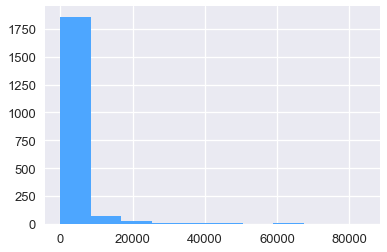

In [210]:
df_archive_c.retweet_count.hist();

In [211]:
df_archive_c.favorite_count.describe()

count      1967.000000
mean       8822.964921
std       12903.857243
min           0.000000
25%        1888.000000
50%        3997.000000
75%       11006.500000
max      165044.000000
Name: favorite_count, dtype: float64

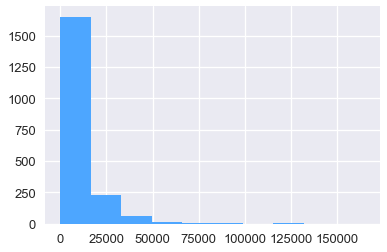

In [212]:
df_archive_c.favorite_count.hist();

<a id='b2_retweet_and_favorite'></a>
### B2. Retweet and Favorite Trends

<a id='b2a_retweet_count'></a>
#### B2a. Retweet Count

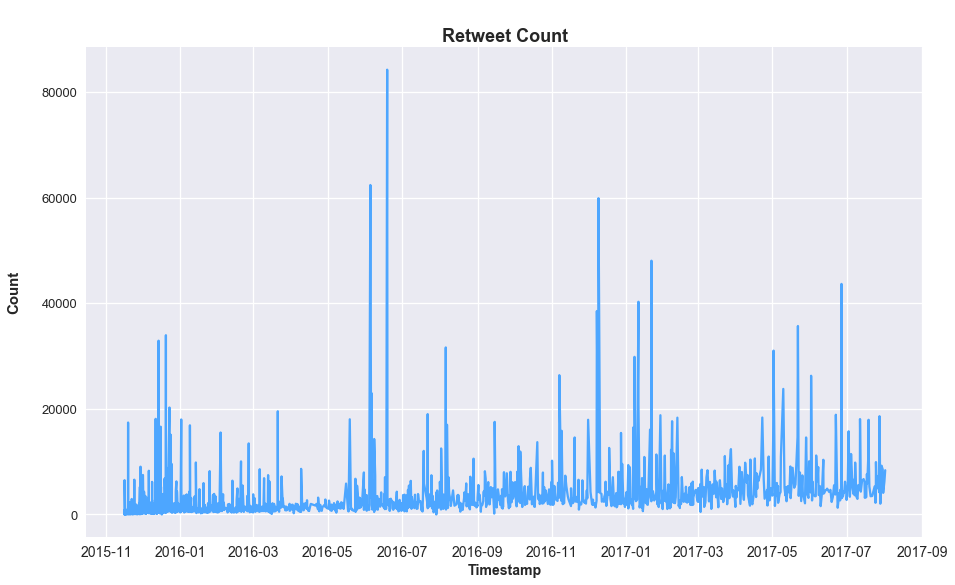

In [213]:
fig = plt.figure(figsize=(15,9))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(df_archive_c.timestamp,df_archive_c.retweet_count);
plt.title('\nRetweet Count',fontsize=18,weight='bold')
plt.ylabel('Count\n',fontsize=15,weight='bold')
plt.yticks(fontsize=13)
plt.xticks(fontsize=14)
plt.xlabel('Timestamp',fontsize=14,weight='bold');

> From the above plot, we cannot see a trend in retweet count. We need to sum the retweet count by one-week period. This is done below.

In [214]:
weekly_retweet = df_archive_c.groupby(pd.Grouper(key='timestamp', freq='1w'))['retweet_count'].sum()\
                    .reset_index().sort_values('timestamp')[:-1]
weekly_retweet.head(2)

,timestamp,retweet_count
0,2015-11-15,599.0
1,2015-11-22,70656.0


In [215]:
df_weekly_retweet = weekly_retweet.sort_values('timestamp')
df_weekly_retweet['date_f'] = pd.factorize(df_weekly_retweet['timestamp'])[0] + 1
mapping = dict(zip(df_weekly_retweet['date_f'], df_weekly_retweet['timestamp'].dt.date))

df_weekly_retweet.head(2)

,timestamp,retweet_count,date_f
0,2015-11-15,599.0,1
1,2015-11-22,70656.0,2


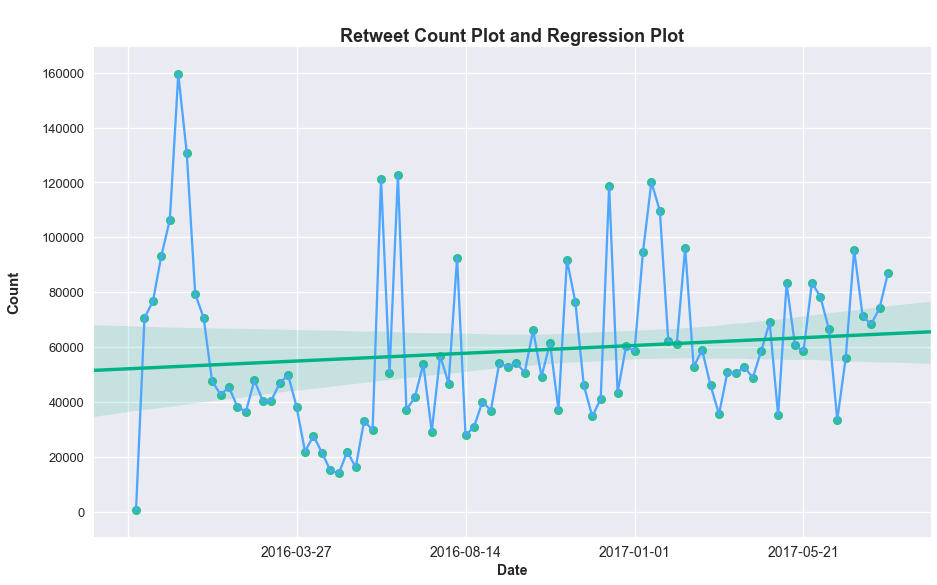

In [216]:
fig = plt.figure(figsize=(15,9))
ax1 = fig.add_subplot(1,1,1)

# Retweet Plot
ax1.plot(df_weekly_retweet.date_f,df_weekly_retweet.retweet_count)
# Regression Plot
sns.regplot('date_f', 'retweet_count', data=df_weekly_retweet,ax=ax1)

plt.title('\nRetweet Count Plot and Regression Plot',fontsize=18,weight='bold')
plt.ylabel('Count\n',fontsize=15,weight='bold')
plt.yticks(fontsize=13)
plt.xticks(fontsize=14)
plt.xlabel('Date',fontsize=14,weight='bold')

labels = pd.Series(ax1.get_xticks()).map(mapping).fillna('')
ax1.set_xticklabels(labels);
#plt.savefig('report-png/1_retweet_count_regression.png')

> We can see a general rise in retweet count over the months, albeit a slow rise.

<a id='b2b_favorite_count'></a>
#### B2b. Favorite Count

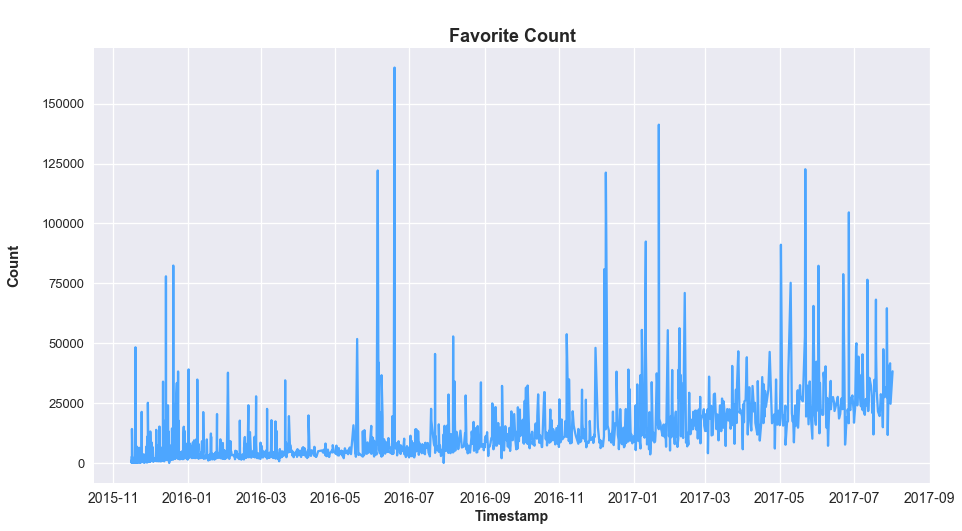

In [217]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(df_archive_c.timestamp,df_archive_c.favorite_count)
plt.title('\nFavorite Count',fontsize=18,weight='bold')
plt.ylabel('Count\n',fontsize=15,weight='bold')
plt.yticks(fontsize=13)
plt.xticks(fontsize=14)
plt.xlabel('Timestamp',fontsize=14,weight='bold');

> From the above plot, we cannot see a trend in favorite count. We need to sum the favorite count by one-week period. This is done below.

In [218]:
weekly_favorite = df_archive_c.groupby(pd.Grouper(key='timestamp', freq='1w'))['favorite_count'].sum()\
                    .reset_index().sort_values('timestamp')[:-1]
weekly_favorite.head(2)

,timestamp,favorite_count
0,2015-11-15,2799.0
1,2015-11-22,165503.0


In [219]:
df_weekly_favorite = weekly_favorite.sort_values('timestamp')
df_weekly_favorite['date_f'] = pd.factorize(df_weekly_favorite['timestamp'])[0] + 1
mapping = dict(zip(df_weekly_favorite['date_f'], df_weekly_favorite['timestamp'].dt.date))

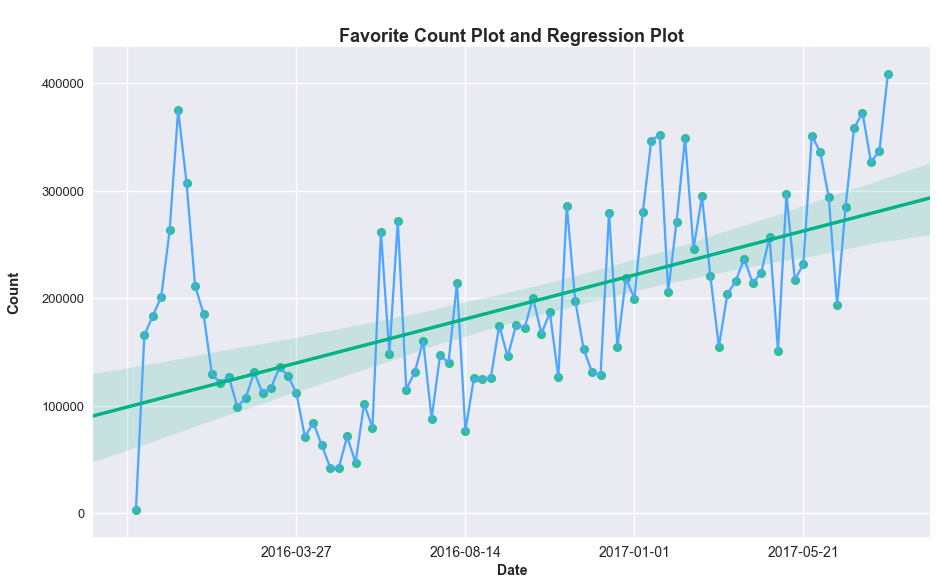

In [220]:
fig = plt.figure(figsize=(15,9))
ax1 = fig.add_subplot(1,1,1)

#Favorite Count Plot
ax1.plot(df_weekly_favorite.date_f,df_weekly_favorite.favorite_count)
#Regression Plot
sns.regplot('date_f', 'favorite_count', data=df_weekly_favorite,ax=ax1)

plt.title('\nFavorite Count Plot and Regression Plot',fontsize=18,weight='bold')
plt.ylabel('Count\n',fontsize=15,weight='bold')
plt.yticks(fontsize=13)
plt.xticks(fontsize=14)
plt.xlabel('Date',fontsize=14,weight='bold')

labels = pd.Series(ax1.get_xticks()).map(mapping).fillna('')
ax1.set_xticklabels(labels);
#plt.savefig('report-png/2_favorite_count_regression.png')

> We can clearly see a general rise in favorite count over the months.

<a id='b2c_favorite_count'></a>
#### B2c. Favorite Count and Retweet Count Superimposed

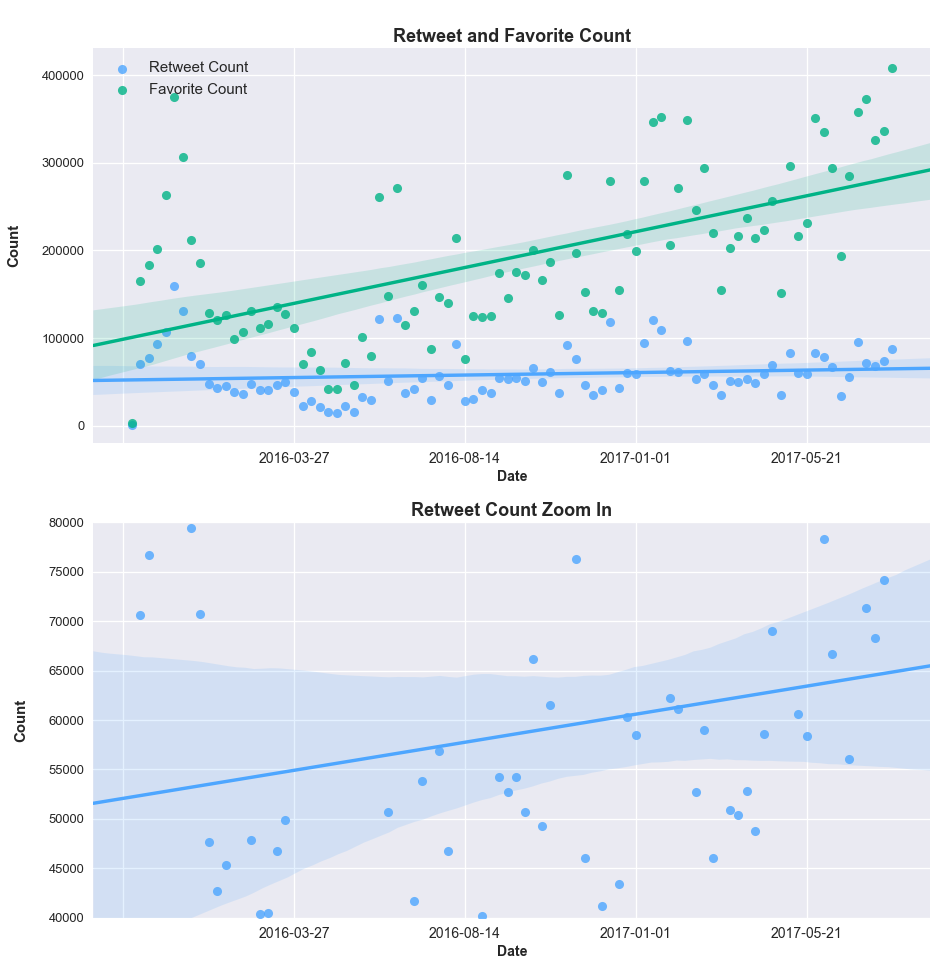

In [221]:
fig = plt.figure(figsize=(15,16))
ax1 = fig.add_subplot(2,1,1)


df_weekly_retweet = weekly_retweet.sort_values('timestamp')
df_weekly_retweet['date_f'] = pd.factorize(df_weekly_retweet['timestamp'])[0] + 1
mapping = dict(zip(df_weekly_retweet['date_f'], df_weekly_retweet['timestamp'].dt.date))
sns.regplot('date_f', 'retweet_count', data=df_weekly_retweet,ax=ax1,label='Retweet Count')


df_weekly_favorite = weekly_favorite.sort_values('timestamp')
df_weekly_favorite['date_f'] = pd.factorize(df_weekly_favorite['timestamp'])[0] + 1
mapping = dict(zip(df_weekly_favorite['date_f'], df_weekly_favorite['timestamp'].dt.date))
sns.regplot('date_f', 'favorite_count', data=df_weekly_favorite,ax=ax1,label='Favorite Count')
plt.legend(fontsize=15,loc='upper left')
plt.title('\nRetweet and Favorite Count',fontsize=18,weight='bold')
plt.ylabel('Count\n',fontsize=15,weight='bold')
plt.yticks(fontsize=13)


labels = pd.Series(ax1.get_xticks()).map(mapping).fillna('')
ax1.set_xticklabels(labels);
plt.xticks(fontsize=14)
plt.xlabel('Date',fontsize=14,weight='bold')

# ----------------------------------------
#               second subplot
# ----------------------------------------
ax2 = fig.add_subplot(2,1,2)
sns.regplot('date_f', 'retweet_count', data=df_weekly_retweet,ax=ax2)
# zoom in
plt.ylim(40000,80000)
plt.title('\n\nRetweet Count Zoom In',fontsize=18,weight='bold')
plt.ylabel('Count\n',fontsize=15,weight='bold')
plt.yticks(fontsize=13)

labels = pd.Series(ax2.get_xticks()).map(mapping).fillna('')
ax2.set_xticklabels(labels);
plt.xticks(fontsize=14)
plt.xlabel('Date',fontsize=14,weight='bold');
#plt.savefig('report-png/3_retweet_fav_superimposed.png')

> When plotting retweet and favorite count on the same plot, we can clearly see that the rise of count is steeper for Favorite Count than Retweet Count. We need to zoom in the regression plot for Retweet Count to see the rise of its count.

<a id='b3_relationship'></a>
### B3. Relationship between Retweet/Favorite Count and Rating Numerator

In [222]:
cols = ['tweet_id','retweet_count','favorite_count','rating_numerator']
df_archive_c[cols].sample(3)

,tweet_id,retweet_count,favorite_count,rating_numerator
403,805487436403003392,2801.0,9440.0,12.0
338,817415592588222464,1061.0,6022.0,11.0
249,832273440279240704,2529.0,11973.0,14.0


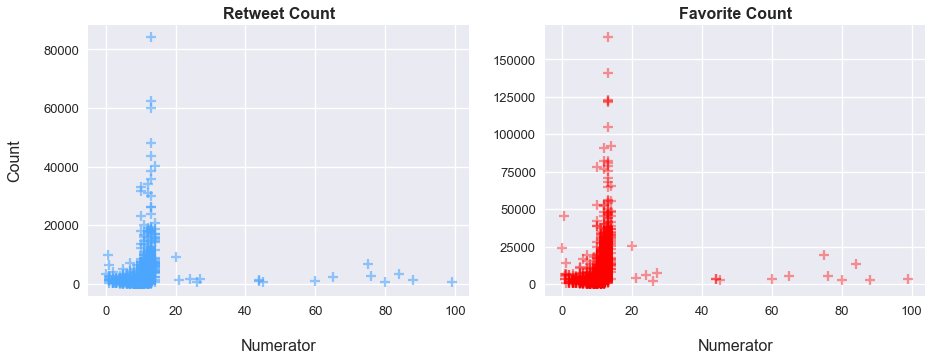

In [223]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1,2,1)
ax1.scatter(df_archive_c['rating_numerator'],df_archive_c['retweet_count'],marker='+',alpha=0.6)
plt.title('Retweet Count',fontsize=16,weight='bold')
plt.ylabel('Count\n',fontsize=16)
plt.yticks(fontsize=13); plt.xticks(fontsize=13);
plt.xlabel('\nNumerator',fontsize=16)

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(df_archive_c['rating_numerator'],df_archive_c['favorite_count'],marker='+',color='red',alpha=0.4)
plt.title('Favorite Count',fontsize=16,weight='bold')
plt.yticks(fontsize=13); plt.xticks(fontsize=13);
plt.xlabel('\nNumerator',fontsize=16);
#plt.savefig('report-png/4_retweet_fav_numerator_scatter.png')

> From Figure above, one can’t tell if there is a relationship between Retweet/Favorite Count and rating_numerator.

In [224]:
df_archive_c['retweet_count'].describe()

count     1967.000000
mean      2687.580071
std       4778.458338
min          0.000000
25%        596.000000
50%       1298.000000
75%       3074.000000
max      84245.000000
Name: retweet_count, dtype: float64

In [225]:
retweet_count_interval = pd.interval_range(start=0,end=90000,freq=10000)
retweet_distro = pd.Series([0,0,0,0,0,0,0,0,0],index=retweet_count_interval)

In [226]:
for val in df_archive_c['retweet_count']:
    for interval in retweet_count_interval:
        if val in interval:
            retweet_distro.loc[interval] += 1
            break
retweet_distro

(0, 10000]        1884
(10000, 20000]      62
(20000, 30000]       7
(30000, 40000]       6
(40000, 50000]       3
(50000, 60000]       1
(60000, 70000]       1
(70000, 80000]       0
(80000, 90000]       1
dtype: int64

#### A few observations on retweet distribution:
- Most frequent retweet counts is between 0 and 10,000. This happens 1,884 times. 
- Next frequent retweet counts is between 10,000 and 20,000. This happens 62 times.
- Retweet counts above 20,000 only occur sparsely. 

Text(0.5,1,'Retweet Count Distribution')

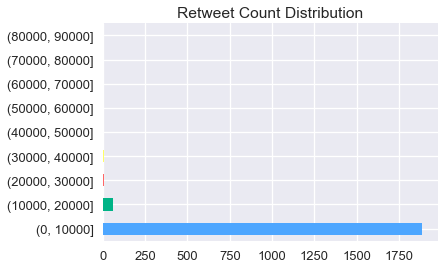

In [227]:
retweet_distro.plot.barh()
plt.title('Retweet Count Distribution')

> I won't be doing for `favorite count` because both have similar looking distribution. Therefore both counts need a log scale.

- As can be seen from retweet_distro (retweet distribution), scatter and barh plot above, data is concentrated below 20 for rating numerator. Also data is concentrated below 20000 for retweet count. We have to make use of mathematics utility -- logarithm base 10. With logarithm base 10, every unit increase is equivalent to multiplying by a factor of 10. Think of `Ritcher scale` for an anology. 
<br>

- Also use log scale for favorite count.
<br>

- `In summary`, use log scale for both retweet and favorite count. Also we are only interested in rating_numerator below 18.

#### Transforming into log scale

In [228]:
ratings_df = df_archive_c.query('rating_numerator < 18').copy()
ratings_df.retweet_count = ratings_df.retweet_count.transform(lambda x:np.log10(x))
ratings_df.favorite_count = ratings_df.favorite_count.transform(lambda x:np.log10(x))

In [229]:
ratings_df[cols].sample(3)

,tweet_id,retweet_count,favorite_count,rating_numerator
996,707969809498152960,3.016197,3.453012,11.0
1491,675432746517426176,2.775974,3.199481,12.0
1035,704819833553219584,3.030600,3.443576,7.0


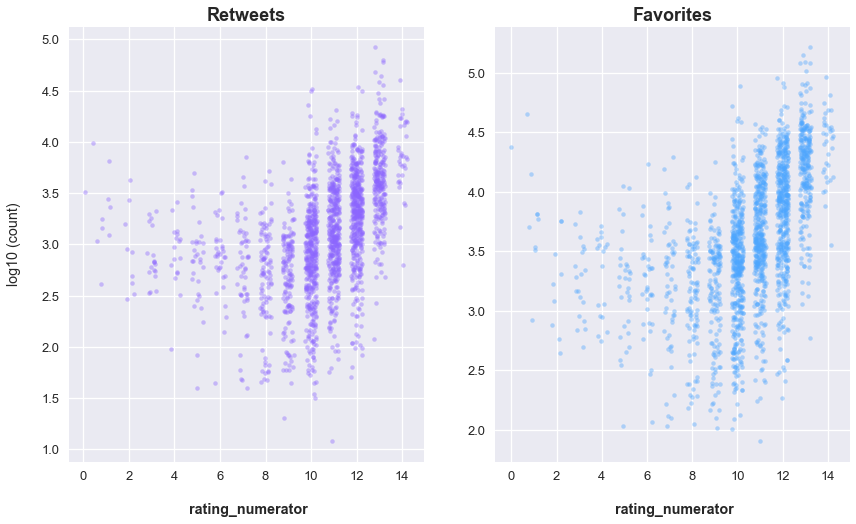

In [230]:
fig = plt.figure(figsize=(14,8))

ax1 = fig.add_subplot(1,2,1)
sns.regplot(data=ratings_df,y=ratings_df['retweet_count'],x=ratings_df['rating_numerator'],ax=ax1,
           x_jitter=0.25,
           scatter_kws={'alpha':0.4,'s':20},
           fit_reg=False,
           color=my_palette[4])
plt.title('Retweets',fontsize=18,weight='bold')
plt.ylabel('log10 (count)\n')
plt.xlabel('\n rating_numerator',weight='bold')

ax2 = fig.add_subplot(1,2,2)
sns.regplot(data=ratings_df,y=ratings_df['favorite_count'],x=ratings_df['rating_numerator'],ax=ax2,
            x_jitter=0.25,
            scatter_kws={'alpha':0.4,'s':20},
            fit_reg=False,
            color=my_palette[0])
plt.title('Favorites',fontsize=18,weight='bold')
plt.ylabel('')
plt.xlabel('\n rating_numerator',weight='bold');
#plt.savefig('report-png/5_retweet_fav_numerator_regplot_logscale.png')

- Looking at the plot above, we can see that there are more retweet and favorite counts as rating-numerator increases. This is also confirmed below.

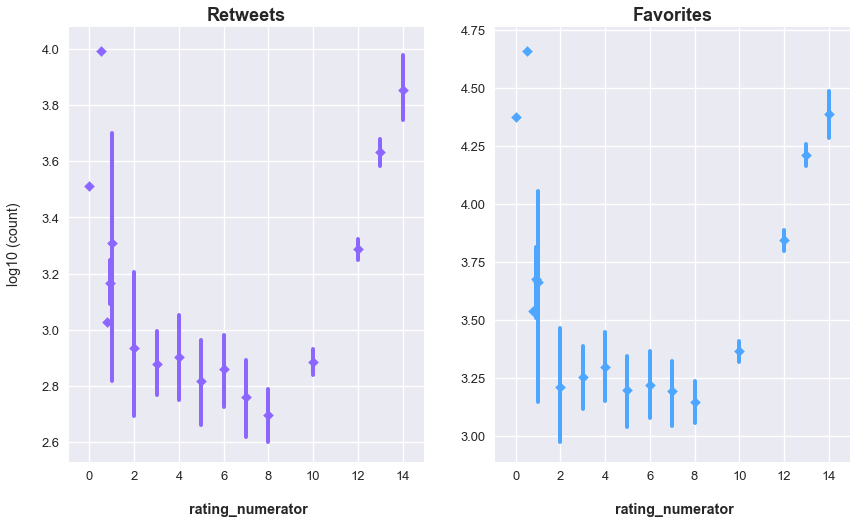

In [231]:
fig = plt.figure(figsize=(14,8))

ax1 = fig.add_subplot(1,2,1)
sns.regplot(data=ratings_df,y=ratings_df['retweet_count'],x=ratings_df['rating_numerator'],ax=ax1,
           marker='D',
           color=my_palette[4],
           x_estimator=np.mean)
plt.title('Retweets',fontsize=18,weight='bold')
plt.ylabel('log10 (count)\n')
plt.xlabel('\n rating_numerator',weight='bold')


ax2 = fig.add_subplot(1,2,2)
sns.regplot(data=ratings_df,y=ratings_df['favorite_count'],x=ratings_df['rating_numerator'],ax=ax2,
           marker='D',
           color=my_palette[0],
           x_estimator=np.mean)
plt.title('Favorites',fontsize=18,weight='bold')
plt.ylabel('')
plt.xlabel('\n rating_numerator',weight='bold');
#plt.savefig('report-png/6_retweet_fav_numerator_regplot_mean_estimator_logscale.png')

- In the above plot, we take the mean of retweet and favorite count of each numerator corridor (discrete variable). 
- The fitted line is a positive one. This means that as rating_numerator increases, retweet and favorite counts also increase.
- (The mean value decreases between rating_numerator 0 and 8. The mean value increases when rating_numerator > 8. But in general, the fitted line is positive.) 

In [232]:
low_ratings_df = df_archive_c.query('rating_numerator < 2').copy()

In [233]:
selected_cols = ['rating_numerator','retweet_count','favorite_count']
low_ratings_df[selected_cols]

,rating_numerator,retweet_count,favorite_count
39,0.5,9826.0,45343.0
231,0.0,3265.0,23713.0
753,0.9,1777.0,6523.0
1060,0.9,1437.0,5074.0
1119,0.8,1069.0,3464.0
1265,0.9,1236.0,3216.0
1497,1.0,2748.0,6507.0
1709,1.0,408.0,834.0
1873,1.0,2335.0,5883.0
1949,1.0,6493.0,14173.0


> **Note:** Although from the above two graphs, retweet and favorite counts increase as rating_numerator increases, this doesn't mean that dogs having low rating numerator receive 'no love'. From the data above, retweet and favorite counts are still relatively high! (although rating numerator range from 0 to 1).

### References for section B
<a href='https://stackoverflow.com/questions/45281297/group-by-week-in-pandas'>groupby datetime</a>


<a href='https://stackoverflow.com/questions/44354614/seaborn-regplot-using-datetime64-as-the-x-axis'>Seaborn doesn't support datetimes in regplot but here's an ugly hack</a>


<a id='c_videos_images'></a>
## C. Videos and Images of Highest/Lowest Retweet and Favorite Counts

<a id='c1_high_retweets'></a>
### C1. High Retweets

In [234]:
high_retweet_indx = df_archive_c.retweet_count.nlargest(5).index
col_high_retweet = ['tweet_id','text','name','retweet_count','favorite_count','rating_numerator','rating_denominator',\
                    'dog_type']
high_retweet_df = df_archive_c[col_high_retweet].iloc[high_retweet_indx]
high_retweet_df

,tweet_id,text,name,retweet_count,favorite_count,rating_numerator,rating_denominator,dog_type
766,744234799360020481,Here's a doggo realizing you can stand in a po...,NaN,84245.0,165044.0,13.0,10.0,doggo
801,739238157791694849,Here's a doggo blowing bubbles. It's downright...,NaN,62404.0,122085.0,13.0,10.0,doggo
395,807106840509214720,This is Stephan. He just wants to help. 13/10 ...,Stephan,59896.0,121199.0,13.0,10.0,NaN
304,822872901745569793,Here's a super supportive puppo participating ...,NaN,48062.0,141213.0,13.0,10.0,puppo
58,879415818425184262,This is Duddles. He did an attempt. 13/10 some...,Duddles,43668.0,104588.0,13.0,10.0,NaN


In [235]:
high_retweet_df.describe()

,retweet_count,favorite_count,rating_numerator,rating_denominator
count,5.00000,5.000000,5.0,5.0
mean,59655.00000,130825.800000,13.0,10.0
std,15829.28457,23109.944541,0.0,0.0
min,43668.00000,104588.000000,13.0,10.0
25%,48062.00000,121199.000000,13.0,10.0
50%,59896.00000,122085.000000,13.0,10.0
75%,62404.00000,141213.000000,13.0,10.0
max,84245.00000,165044.000000,13.0,10.0


In [236]:
jpg_url_list = []
for tweet_id in high_retweet_df.tweet_id:
    #print(tweet_id)
    image_url_series = df_predictions_c[df_predictions_c.tweet_id==tweet_id]['jpg_url']
    duplicated_mask = image_url_series.duplicated()
    image_url = image_url_series[~duplicated_mask]
    #image_url = image_url.values[0]
    image_url = image_url.iloc[0]
    jpg_url_list.append(image_url)

In [237]:
twitter_url_list = []
for row in high_retweet_indx:
    twitter_url_list.append(df_archive_c.short_url.loc[row])

In [238]:
data_dict = {'twitter_url':twitter_url_list,'jpg_url':jpg_url_list}
df_high_retweet_url = pd.DataFrame(data_dict)

In [239]:
# Go to web page. cute af! 😍 . Four has videos. One only image. 
#This is from df_archive_c. 4 out of 5 are videos link. one is image link.
df_high_retweet_url.style.format(make_clickable)

,twitter_url,jpg_url
0,https://t.co/7wE9LTEXC4,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg
1,https://t.co/YcXgHfp1EC,https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg
2,https://t.co/DkBYaCAg2d,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg
3,https://t.co/nTz3FtorBc,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
4,https://t.co/UDT7ZkcTgY,https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg


### A few observations
- All twitter urls have videos embedded except for the fourth item on the list above.
- Therefore if you want a high retweet count numbers in your tweets, post a cute dog videos.
- Please click the second url. You will see that videos is worth more than a thousand pictures. <br>
Now I know why they have large retweet counts because they are cute af 😍 .

In [240]:
# this is the second item on the list. if you just look at the picture below  you won't it funny.
# if you look at the videos embedded on the twitter, you will also retweet it 😍!
# Please click on the second link in the table above.
Image(url=jpg_url_list[1],width=500,height=500)

<a id='c2_low_retweets'></a>
### C2. Low Retweets

In [241]:
low_retweet_indx = df_archive_c.retweet_count.nsmallest(5).index
col_low_retweet = ['tweet_id','text','name','retweet_count','favorite_count','rating_numerator','rating_denominator',\
                    'dog_type']
low_retweet_df = df_archive_c[col_low_retweet].iloc[low_retweet_indx]
low_retweet_df.head()

,tweet_id,text,name,retweet_count,favorite_count,rating_numerator,rating_denominator,dog_type
652,758854675097526272,This is Lilli Bee &amp; Honey Bear. Unfortunat...,Bear,0.0,0.0,11.0,10.0,NaN
1436,677187300187611136,Here we see a Byzantine Rigatoni. Very aerodyn...,Rigatoni,0.0,0.0,9.0,10.0,NaN
1950,666102155909144576,Oh my. Here you are seeing an Adobe Setter giv...,NaN,12.0,80.0,11.0,10.0,NaN
1930,666447344410484738,This is Scout. She is a black Downton Abbey. I...,Scout,20.0,104.0,9.0,10.0,NaN
1838,668291999406125056,I can't do better than he did. 10/10,NaN,32.0,251.0,10.0,10.0,NaN


In [242]:
low_retweet_df.describe()

,retweet_count,favorite_count,rating_numerator,rating_denominator
count,5.000000,5.000000,5.0,5.0
mean,12.800000,87.000000,10.0,10.0
std,13.682105,102.922301,1.0,0.0
min,0.000000,0.000000,9.0,10.0
25%,0.000000,0.000000,9.0,10.0
50%,12.000000,80.000000,10.0,10.0
75%,20.000000,104.000000,11.0,10.0
max,32.000000,251.000000,11.0,10.0


In [243]:
jpg_url_list = []
twitter_url_list = []
for tweet_id in low_retweet_df.tweet_id:
    jpg_url_series = df_predictions_c[df_predictions_c.tweet_id==tweet_id]['jpg_url']
    duplicated_mask = jpg_url_series.duplicated()
    jpg_url = jpg_url_series[~duplicated_mask]
    jpg_url = jpg_url.iloc[0]
    jpg_url_list.append(jpg_url)
    #-------twiiter short_url from df_archive_c
    short_url = df_archive_c[df_archive_c.tweet_id == tweet_id]['short_url']
    short_url = short_url.iloc[0]
    twitter_url_list.append(short_url)

In [244]:
data_dict = {'twitter_url':twitter_url_list,'jpg_url':jpg_url_list}
low_retweet_url_df = pd.DataFrame(data_dict)
low_retweet_url_df.style.format(make_clickable)

,twitter_url,jpg_url
0,https://t.co/4UrfOZhztW,https://pbs.twimg.com/media/Cof-SuqVYAAs4kZ.jpg
1,https://t.co/gzI0m6wXRo,https://pbs.twimg.com/media/CWXaQMBWcAAATDi.jpg
2,https://t.co/11LvqN4WLq,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg
3,https://t.co/kH60oka1HW,https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg
4,https://t.co/fM0KXns7Or,https://pbs.twimg.com/media/CUZABzGW4AE5F0k.jpg


<a id='c3_high_favorites'></a>
### C3. High Favorites

In [245]:
high_fav_indx = df_archive_c.favorite_count.nlargest(5).index
col_high_fav = ['tweet_id','text','name','retweet_count','favorite_count','rating_numerator','rating_denominator',\
                    'dog_type']

high_fav_df = df_archive_c.loc[high_fav_indx,col_high_fav]
high_fav_df.head()

,tweet_id,text,name,retweet_count,favorite_count,rating_numerator,rating_denominator,dog_type
766,744234799360020481,Here's a doggo realizing you can stand in a po...,NaN,84245.0,165044.0,13.0,10.0,doggo
304,822872901745569793,Here's a super supportive puppo participating ...,NaN,48062.0,141213.0,13.0,10.0,puppo
108,866450705531457537,This is Jamesy. He gives a kiss to every other...,Jamesy,35694.0,122615.0,13.0,10.0,pupper
801,739238157791694849,Here's a doggo blowing bubbles. It's downright...,NaN,62404.0,122085.0,13.0,10.0,doggo
395,807106840509214720,This is Stephan. He just wants to help. 13/10 ...,Stephan,59896.0,121199.0,13.0,10.0,NaN


In [246]:
high_fav_df.describe()

,retweet_count,favorite_count,rating_numerator,rating_denominator
count,5.000000,5.000000,5.0,5.0
mean,58060.200000,134431.200000,13.0,10.0
std,18083.787054,19041.262358,0.0,0.0
min,35694.000000,121199.000000,13.0,10.0
25%,48062.000000,122085.000000,13.0,10.0
50%,59896.000000,122615.000000,13.0,10.0
75%,62404.000000,141213.000000,13.0,10.0
max,84245.000000,165044.000000,13.0,10.0


In [247]:
jpg_url_list = []
twitter_url_list = []
for tweet_id in high_fav_df.tweet_id:
    jpg_url_series = df_predictions_c[df_predictions_c.tweet_id==tweet_id]['jpg_url']
    duplicated_mask = jpg_url_series.duplicated()
    jpg_url = jpg_url_series[~duplicated_mask]
    jpg_url = jpg_url.iloc[0]
    jpg_url_list.append(jpg_url)
    #-------twiiter short_url from df_archive_c
    short_url = df_archive_c[df_archive_c.tweet_id == tweet_id]['short_url']
    short_url = short_url.iloc[0]
    twitter_url_list.append(short_url)

In [248]:
data_dict = {'twitter_url':twitter_url_list,'jpg_url':jpg_url_list}
high_fav_url_df = pd.DataFrame(data_dict)
high_fav_url_df.style.format(make_clickable)

,twitter_url,jpg_url
0,https://t.co/7wE9LTEXC4,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg
1,https://t.co/nTz3FtorBc,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
2,https://t.co/wk7TfysWHr,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg
3,https://t.co/YcXgHfp1EC,https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg
4,https://t.co/DkBYaCAg2d,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg


### A few observations
- Three links have videos embedded in its twitter. The first, fourth and fifth urls have videos <br>
while the second and third are just jpg.
- Three urls also in high retweet count list -- the first, fourth and fifth urls.

<a id='c4_low_favorites'></a>
### C4. Low Favorites

In [249]:
low_fav_indx = df_archive_c.favorite_count.nsmallest(5).index
col_low_fav = ['tweet_id','text','name','retweet_count','favorite_count','rating_numerator','rating_denominator',\
                    'dog_type']

low_fav_df = df_archive_c.loc[low_fav_indx,col_low_fav]
low_fav_df.head()

,tweet_id,text,name,retweet_count,favorite_count,rating_numerator,rating_denominator,dog_type
652,758854675097526272,This is Lilli Bee &amp; Honey Bear. Unfortunat...,Bear,0.0,0.0,11.0,10.0,NaN
1436,677187300187611136,Here we see a Byzantine Rigatoni. Very aerodyn...,Rigatoni,0.0,0.0,9.0,10.0,NaN
1950,666102155909144576,Oh my. Here you are seeing an Adobe Setter giv...,NaN,12.0,80.0,11.0,10.0,NaN
1948,666268910803644416,Very concerned about fellow dog trapped in com...,NaN,35.0,102.0,10.0,10.0,NaN
1930,666447344410484738,This is Scout. She is a black Downton Abbey. I...,Scout,20.0,104.0,9.0,10.0,NaN


In [250]:
low_fav_df.describe()

,retweet_count,favorite_count,rating_numerator,rating_denominator
count,5.000000,5.000000,5.0,5.0
mean,13.400000,57.200000,10.0,10.0
std,14.758049,53.058458,1.0,0.0
min,0.000000,0.000000,9.0,10.0
25%,0.000000,0.000000,9.0,10.0
50%,12.000000,80.000000,10.0,10.0
75%,20.000000,102.000000,11.0,10.0
max,35.000000,104.000000,11.0,10.0


In [251]:
jpg_url_list = []
twitter_url_list = []
for tweet_id in low_fav_df.tweet_id:
    jpg_url_series = df_predictions_c[df_predictions_c.tweet_id==tweet_id]['jpg_url']
    duplicated_mask = jpg_url_series.duplicated()
    jpg_url = jpg_url_series[~duplicated_mask]
    jpg_url = jpg_url.iloc[0]
    jpg_url_list.append(jpg_url)
    #-------twiiter short_url from df_archive_c
    short_url = df_archive_c[df_archive_c.tweet_id == tweet_id]['short_url']
    short_url = short_url.iloc[0]
    twitter_url_list.append(short_url)

In [252]:
data_dict = {'twitter_url':twitter_url_list,'jpg_url':jpg_url_list}
low_fav_url_df = pd.DataFrame(data_dict)
low_fav_url_df.style.format(make_clickable)

,twitter_url,jpg_url
0,https://t.co/4UrfOZhztW,https://pbs.twimg.com/media/Cof-SuqVYAAs4kZ.jpg
1,https://t.co/gzI0m6wXRo,https://pbs.twimg.com/media/CWXaQMBWcAAATDi.jpg
2,https://t.co/11LvqN4WLq,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg
3,https://t.co/0yxApIikpk,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg
4,https://t.co/kH60oka1HW,https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg


### A few observations 
- All twitter urls are pictures.
- All tweets except the fourth item are in low favorite count url

### References for Section C

- make clickable: https://stackoverflow.com/questions/42263946/how-to-create-a-table-with-clickable-hyperlink-in-pandas-jupyter-notebook

<a id='d_dog_types'></a>
## D. Dog Types

In [253]:
df_archive_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1967 entries, 0 to 1966
Data columns (total 12 columns):
tweet_id              1967 non-null object
timestamp             1967 non-null datetime64[ns]
source                1967 non-null object
text                  1967 non-null object
expanded_urls         1967 non-null object
rating_numerator      1967 non-null float64
rating_denominator    1967 non-null float64
name                  1363 non-null object
dog_type              321 non-null category
retweet_count         1967 non-null float64
favorite_count        1967 non-null float64
short_url             1967 non-null object
dtypes: category(1), datetime64[ns](1), float64(4), object(6)
memory usage: 171.2+ KB


> **NOTE**: we have only 16.3% of dog_type data (321/1967). Therefore, we need to put this information at the back of our mind when looking at dog_type statistics.

In [254]:
dog_counts = df_archive_c.groupby('dog_type')['tweet_id'].count()
dog_counts

dog_type
doggo       65
floofer      3
pupper     225
puppo       28
Name: tweet_id, dtype: int64

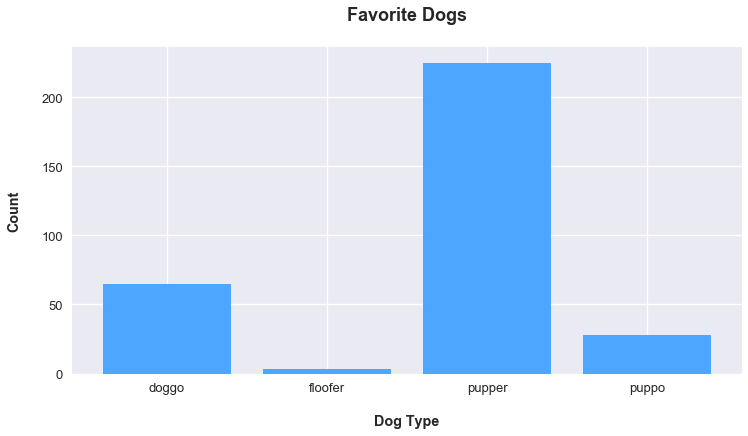

In [255]:
plt.subplots(figsize=(12,6))
plt.bar([1,2,3,4],dog_counts,tick_label=['doggo','floofer','pupper','puppo'])
plt.title('Favorite Dogs\n',fontsize=18,weight='bold')
plt.xlabel('\nDog Type',weight='bold')
plt.ylabel('Count\n',weight='bold');

<a id='d1_conditional_probability'></a>
### D1. Conditional Probability
- Using the concept of statistics called conditional probability, we can obtain interesting statistics.
- Given the dogtype as given, what is the probability or frequency distribution of Retweet and Favorite Count.
- The notation above that I will use is RetweetCount | Dogtype and FavoriteCount | Dogtype
- We can make use of `seaborn boxplot` to plot this conditional probablility.
- A 'hard' way is used to obtain `RetweetCount | Dogtype and FavoriteCount | Dogtype` data.

In [256]:
doggo_retweet_series = df_archive_c[df_archive_c.dog_type == 'doggo']['retweet_count']
floofer_retweet_series = df_archive_c[df_archive_c.dog_type == 'floofer']['retweet_count']
pupper_retweet_series = df_archive_c[df_archive_c.dog_type == 'pupper']['retweet_count']
puppo_retweet_series = df_archive_c[df_archive_c.dog_type == 'puppo']['retweet_count']

doggo_favorite_series = df_archive_c[df_archive_c.dog_type == 'doggo']['favorite_count']
floofer_favorite_series = df_archive_c[df_archive_c.dog_type == 'floofer']['favorite_count']
pupper_favorite_series = df_archive_c[df_archive_c.dog_type == 'pupper']['favorite_count']
puppo_favorite_series = df_archive_c[df_archive_c.dog_type == 'puppo']['favorite_count']

In [257]:
data_dict = {'pupper_retweet':pupper_retweet_series,'floofer_retweet':floofer_retweet_series,\
             'doggo_retweet':doggo_retweet_series,'puppo_retweet':puppo_retweet_series,\
             'pupper_favorite':pupper_favorite_series,'floofer_favorite':floofer_favorite_series,\
             'doggo_favorite':doggo_favorite_series,'puppo_favorite':puppo_favorite_series}

stats_dogtype_df = pd.DataFrame(data_dict)
stats_dogtype_df.describe()

,pupper_retweet,floofer_retweet,doggo_retweet,puppo_retweet,pupper_favorite,floofer_favorite,doggo_favorite,puppo_favorite
count,225.000000,3.000000,65.000000,28.000000,225.000000,3.000000,65.000000,28.000000
mean,2296.262222,8091.000000,6092.723077,6578.750000,7172.191111,22154.666667,17777.138462,22824.857143
std,3649.935339,8186.465904,12832.503527,9432.010993,11570.805606,10068.603892,25085.906049,27169.844838
min,87.000000,3103.000000,688.000000,672.000000,332.000000,12023.000000,2487.000000,3145.000000
25%,660.000000,3367.000000,1870.000000,1670.500000,2314.000000,17152.500000,7965.000000,7031.750000
50%,1140.000000,3631.000000,2946.000000,3302.000000,3208.000000,22282.000000,11458.000000,15939.000000
75%,2321.000000,10585.000000,4580.000000,6688.500000,7570.000000,27220.500000,17507.000000,24324.250000
max,35694.000000,17539.000000,84245.000000,48062.000000,122615.000000,32159.000000,165044.000000,141213.000000


#### A few observations on Retweet statistics:
- pupper has the lowest median @ 1,140, while floofer has the highest median @ 3,631. Therefore we expect <br>
  the boxplot for pupper is at the bottom and the boxplot position is the highest. 
 
- We can visualize the range of boxplot by taking the difference between 25th percentile and 75th percentile. <br>
  Thus pupper has the 'shortest' boxplot (2,321 - 660). We expect floofer has the 'longest' boxplot (10,585 - 3,367).

#### A few observations on Favorite statistics:
- We expect the boxplot position pupper at the lowest level since its median is @ 3,208. The boxplot <br>
  position for floofer is highest since its median is @ 22,282.
- We expect puppo has the 'longest' boxplot because of it has the largest difference btw 75th percentile and 25th percentile<br>
  (24,324 - 7,031). The 'shortest' boxplot is pupper.

#### Plotting RetweetCount | Dogtype and FavoriteCount |Dogtype data
> We can use the above dataframe to plot boxplot. But we will make use of `seaborn boxplot`. 

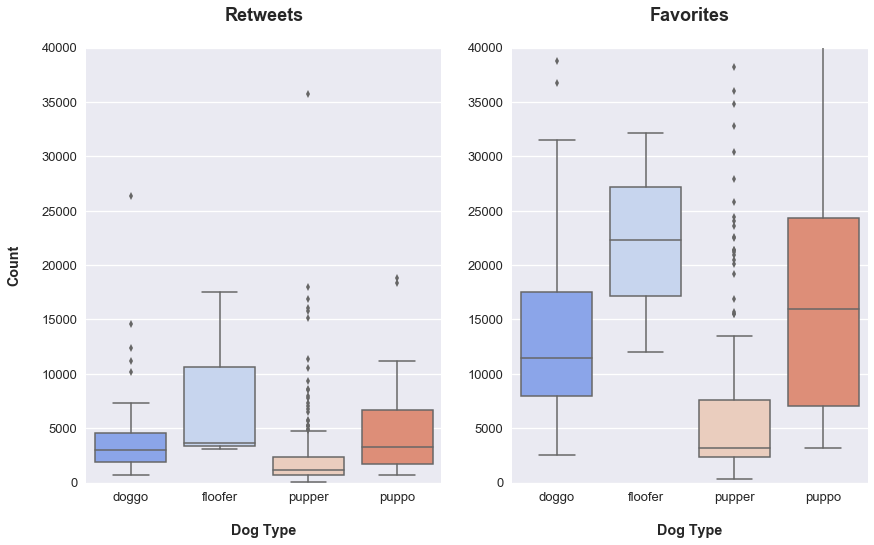

In [258]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(1,2,1)

sns.boxplot(x='dog_type',y='retweet_count',data=df_archive_c,linewidth=1.5,palette='coolwarm')
plt.ylim(0,40000);
plt.title('Retweets\n', fontsize=18, weight='bold')
plt.xlabel('\nDog Type', weight='bold')
plt.ylabel('Count\n', weight='bold');

ax2 = fig.add_subplot(1,2,2)
sns.boxplot(x='dog_type',y='favorite_count',data=df_archive_c,linewidth=1.5,palette='coolwarm')
plt.ylim(0,40000)
plt.title('Favorites\n', fontsize=18, weight='bold')
plt.xlabel('\nDog Type', weight='bold')
plt.ylabel('');

#plt.savefig('boxplot.png')


#### A few observations on seaborn.boxplot above
- Floofer has the most retweet and favorite counts (by median value).
- Also note that floofer has only 3 data points. This explains why it has no outliers.
- Floofer has the longest boxplot in RetweetCount (as observed previously from statistics above).
- Puppo has the longest boxplot in FavoriteCount while pupper has the shortest (discussed previously).

#### Plotting RetweetCount | Dogtype and FavoriteCount | Dogtype using seaborn violinplot

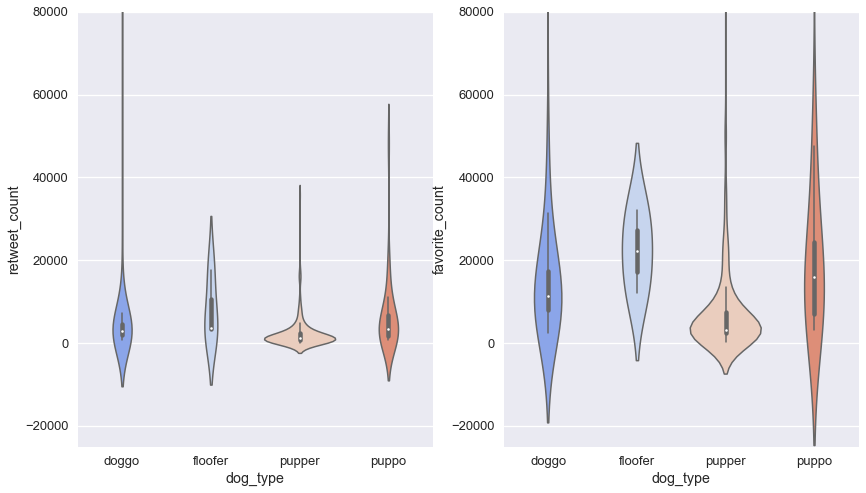

In [259]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(1,2,1)

sns.violinplot(x='dog_type',y='retweet_count',data=df_archive_c,linewidth=1.5,palette='coolwarm')
plt.ylim(-25000,80000);

ax2 = fig.add_subplot(1,2,2)
sns.violinplot(x='dog_type',y='favorite_count',data=df_archive_c,linewidth=1.5,palette='coolwarm')
plt.ylim(-25000,80000);

<a id='d2_popular_names'></a>
### D2. Most Popular Names

In [260]:
df_archive_c.name.value_counts().head(10)

Charlie    12
Oliver     11
Cooper     10
Tucker      9
Lucy        9
Penny       8
Winston     8
Daisy       7
Lola        7
Stanley     6
Name: name, dtype: int64

#### References for section D
Combine series into dataframe https://www.youtube.com/watch?v=wiw9Qo08TIk

<a id='e_predictions'></a>
## E. Predictions

<a id='e1_how_confident'></a>
### E1. How Confident

In [261]:
df_predictions_c.head(3)

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True


In [262]:
confidence = df_predictions_c.groupby('prediction_order')['confidence']

In [263]:
confidence.mean()

prediction_order
1    0.594575
2    0.134542
3    0.060121
Name: confidence, dtype: float64

In [264]:
confidence.median()

prediction_order
1    0.587507
2    0.117003
3    0.049349
Name: confidence, dtype: float64

In [265]:
confidence.std()

prediction_order
1    0.272172
2    0.101067
3    0.050935
Name: confidence, dtype: float64

In [266]:
df_predictions_1 = df_predictions_c[df_predictions_c['prediction_order']==1]
df_predictions_1.head(2)

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True


In [267]:
df_predictions_2 = df_predictions_c[df_predictions_c['prediction_order']==2]
df_predictions_2.head(2)

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


In [268]:
df_predictions_3 = df_predictions_c[df_predictions_c['prediction_order']==3]
df_predictions_3.head(2)

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
5,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,3,Rhodesian_ridgeback,0.072010,True


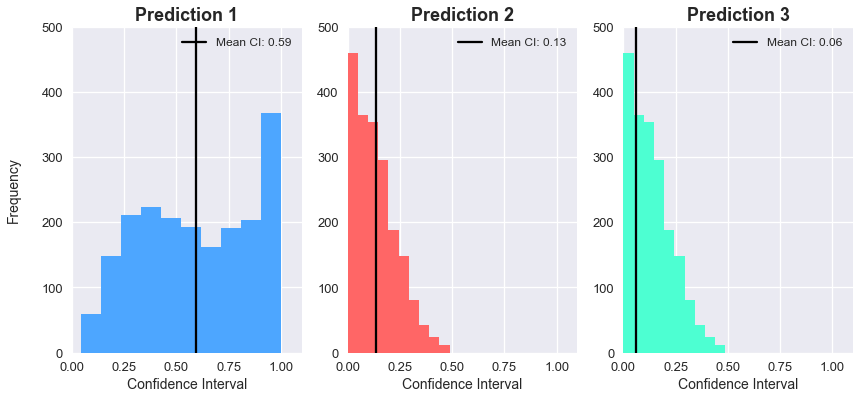

In [269]:
fig = plt.figure(figsize=(14,6))

ax1 = fig.add_subplot(1,3,1)
ax1.hist(x=df_predictions_1['confidence'],bins=10,label='')
plt.axvline(confidence.mean().iloc[0],color='black',label='Mean CI: ' + str(round(confidence.mean().iloc[0],2)))
plt.legend(fontsize=12)
plt.title('Prediction 1',fontsize=18,weight='bold')
plt.xlabel('Confidence Interval',fontsize=14)
plt.ylabel('Frequency\n',fontsize=14)
plt.ylim(0,500)
plt.xlim(0,1.1)

ax2 = fig.add_subplot(1,3,2)
ax2.hist(x=df_predictions_2['confidence'],bins=10,label='',color=my_palette[2])
plt.axvline(confidence.mean().iloc[1],color='black',label='Mean CI: ' + str(round(confidence.mean().iloc[1],2)))
plt.legend(fontsize=12)
plt.title('Prediction 2',fontsize=18,weight='bold')
plt.xlabel('Confidence Interval',fontsize=14)
plt.ylabel('\n',fontsize=14)
plt.ylim(0,500)
plt.xlim(0,1.1)

ax3 = fig.add_subplot(1,3,3)
ax3.hist(x=df_predictions_2['confidence'],bins=10,label='',color=my_palette[5])
plt.axvline(confidence.mean().iloc[2],color='black',label='Mean CI: ' + str(round(confidence.mean().iloc[2],2)))
plt.legend(fontsize=12)
plt.title('Prediction 3',fontsize=18,weight='bold')
plt.xlabel('Confidence Interval',fontsize=14)
plt.ylabel('\n',fontsize=14)
plt.ylim(0,500)
plt.xlim(0,1.1)

plt.show()

- Prediction 1 has the highest mean confidence interval of 0.59.

> Now, we will evaluate predictions tabulated in df_predictions. Five random samples will be generated. `df_predictions_1.sample(5)` . <br>
>
> For practical purposes, five indexes will be pre-selected as shown below:

In [270]:
selected_index = [123,1443,1935,795,2079]

In [271]:
selected_tweet_id = []
for indx in selected_index:
    selected_tweet_id.append(df_predictions_c.tweet_id.loc[indx])
    
selected_tweet_id

['666701168228331520',
 '675522403582218240',
 '682259524040966145',
 '670811965569282048',
 '684959798585110529']

<a id='e1a_prediction1'></a>
#### E1a. Prediction 1

In [272]:
Image(url=df_predictions_c.jpg_url.iloc[selected_index[0]],width=300,height=300)

In [273]:
# Prediction 1
df_predictions_c[df_predictions_c.tweet_id==selected_tweet_id[0]]

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
123,666701168228331520,https://pbs.twimg.com/media/CUCZLHlUAAAeAig.jpg,1,1,Labrador_retriever,0.887707,True
124,666701168228331520,https://pbs.twimg.com/media/CUCZLHlUAAAeAig.jpg,1,2,Chihuahua,0.029307,True
125,666701168228331520,https://pbs.twimg.com/media/CUCZLHlUAAAeAig.jpg,1,3,French_bulldog,0.020756,True


> Even with a cap and cloth on, prediction1 is right on the money.

<a id='e1b_prediction2'></a>
#### E1b. Prediction 2

In [274]:
Image(url=df_predictions_c.jpg_url.iloc[selected_index[1]],width=300,height=300)

In [275]:
# Prediction 2
df_predictions_c[df_predictions_c.tweet_id==selected_tweet_id[1]]

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
1443,675522403582218240,https://pbs.twimg.com/media/CV_wCh8W4AEWWZ9.jpg,1,1,cocker_spaniel,0.299708,True
1444,675522403582218240,https://pbs.twimg.com/media/CV_wCh8W4AEWWZ9.jpg,1,2,golden_retriever,0.263665,True
1445,675522403582218240,https://pbs.twimg.com/media/CV_wCh8W4AEWWZ9.jpg,1,3,Irish_setter,0.080323,True


> Impressive, prediction1 is again correct

<a id='e1c_prediction3'></a>
#### E1c. Prediction 3

In [276]:
Image(url=df_predictions_c.jpg_url.iloc[selected_index[2]],width=400,height=400)

In [277]:
# Prediction 3
df_predictions_c[df_predictions_c.tweet_id==selected_tweet_id[2]]

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
1935,682259524040966145,https://pbs.twimg.com/media/CXffar9WYAArfpw.jpg,1,1,Siberian_husky,0.439670,True
1936,682259524040966145,https://pbs.twimg.com/media/CXffar9WYAArfpw.jpg,1,2,Eskimo_dog,0.340474,True
1937,682259524040966145,https://pbs.twimg.com/media/CXffar9WYAArfpw.jpg,1,3,malamute,0.101253,True


> Wow, prediction1 is again correct.

<a id='e1d_prediction4'></a>
#### E1d. Prediction 4

In [278]:
Image(url=df_predictions_c.jpg_url.iloc[selected_index[3]],width=500,height=500)

In [279]:
# Prediction 4
df_predictions_c[df_predictions_c.tweet_id==selected_tweet_id[3]]

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
795,670811965569282048,https://pbs.twimg.com/media/CU8z65IUEAQBc4q.jpg,1,1,basset,0.994090,True
796,670811965569282048,https://pbs.twimg.com/media/CU8z65IUEAQBc4q.jpg,1,2,Walker_hound,0.003973,True
797,670811965569282048,https://pbs.twimg.com/media/CU8z65IUEAQBc4q.jpg,1,3,beagle,0.001406,True


> basset is correct!

<a id='e1e_prediction5'></a>
#### E1e. Prediction 5

In [280]:
Image(url=df_predictions_c.jpg_url.iloc[selected_index[4]],width=400,height=400)

In [281]:
# Prediction 5
df_predictions_c[df_predictions_c.tweet_id==selected_tweet_id[4]]

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
2079,684959798585110529,https://pbs.twimg.com/media/CYF3TSlWMAAaoG5.jpg,1,1,llama,0.379624,False
2080,684959798585110529,https://pbs.twimg.com/media/CYF3TSlWMAAaoG5.jpg,1,2,triceratops,0.162761,False
2081,684959798585110529,https://pbs.twimg.com/media/CYF3TSlWMAAaoG5.jpg,1,3,hog,0.084251,False


> GOAT! (not greatest of all  time though ) All predictions correctly predict that the picture above is not a dog.